In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download behrad3d/nasa-cmaps
! unzip nasa-cmaps.zip

 73% 9.00M/12.3M [00:00<00:00, 33.8MB/s]
100% 12.3M/12.3M [00:00<00:00, 45.0MB/s]
Archive:  nasa-cmaps.zip
  inflating: CMaps/Damage Propagation Modeling.pdf  
  inflating: CMaps/RUL_FD001.txt     
  inflating: CMaps/RUL_FD002.txt     
  inflating: CMaps/RUL_FD003.txt     
  inflating: CMaps/RUL_FD004.txt     
  inflating: CMaps/readme.txt        
  inflating: CMaps/test_FD001.txt    
  inflating: CMaps/test_FD002.txt    
  inflating: CMaps/test_FD003.txt    
  inflating: CMaps/test_FD004.txt    
  inflating: CMaps/train_FD001.txt   
  inflating: CMaps/train_FD002.txt   
  inflating: CMaps/train_FD003.txt   
  inflating: CMaps/train_FD004.txt   
  inflating: CMaps/x.txt             


In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
import math
import xgboost
import time
from tqdm import tqdm
import keras.models
import keras.layers
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import warnings
warnings.simplefilter('ignore')
from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, roc_auc_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import math
import shutil
import random
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, roc_auc_score, precision_score, recall_score, f1_score
import collections
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Tuning & Splitting Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Loading Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation Liabraries
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, roc_auc_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import warnings
np.random.seed(34)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [37]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [38]:
dftrain = pd.read_csv('/content/CMaps/train_FD004.txt',sep='\s+',header=None,index_col=False,names=col_names)
dfvalid = pd.read_csv('/content/CMaps/test_FD004.txt',sep='\s+',header=None,index_col=False,names=col_names)
y_valid = pd.read_csv('/content/CMaps/RUL_FD004.txt',sep='\s+',header=None,index_col=False,names=['RUL'])
dfvalid.shape

(41214, 26)

In [39]:
train = dftrain.copy()
valid = dfvalid.copy()

In [6]:
train.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


In [40]:
print('Shape of the train dataset : ',train.shape)
print('Shape of the validation dataset : ',valid.shape)
print('Percentage of the validation dataset : ',len(valid)/(len(valid)+len(train)))

Shape of the train dataset :  (61249, 26)
Shape of the validation dataset :  (41214, 26)
Percentage of the validation dataset :  0.4022330011809141


In [41]:
print('Shape of the train dataset : ',train.shape)
print('Shape of the validation dataset : ',valid.shape)
print('Percentage of the validation dataset : ',len(valid)/(len(valid)+len(train)))

Shape of the train dataset :  (61249, 26)
Shape of the validation dataset :  (41214, 26)
Percentage of the validation dataset :  0.4022330011809141


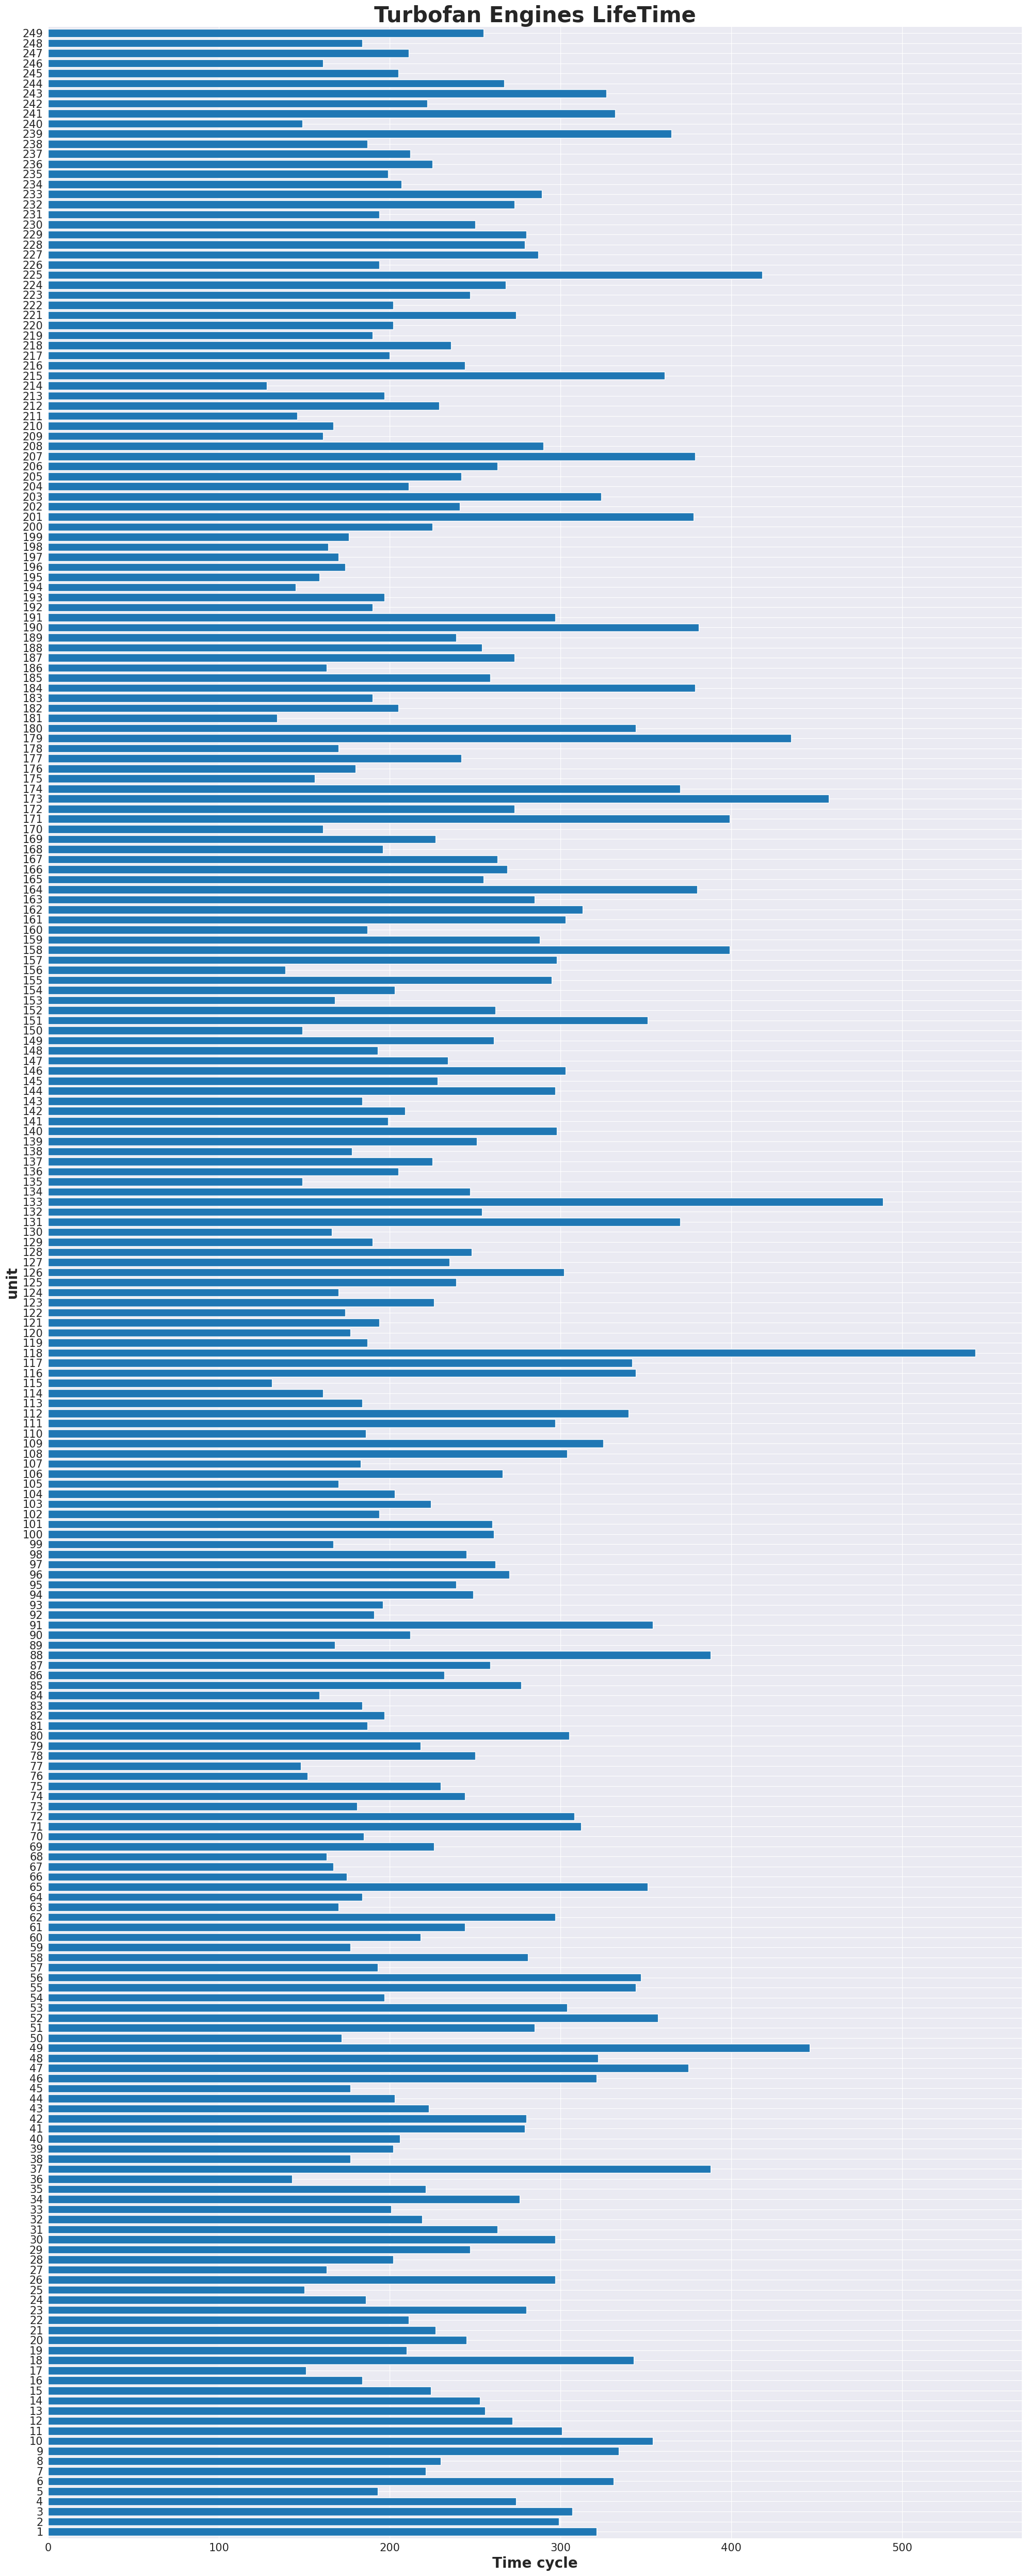

In [42]:
max_time_cycles=train[index_names].groupby('unit_number').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 9.444444444444459, 'max time cycle')

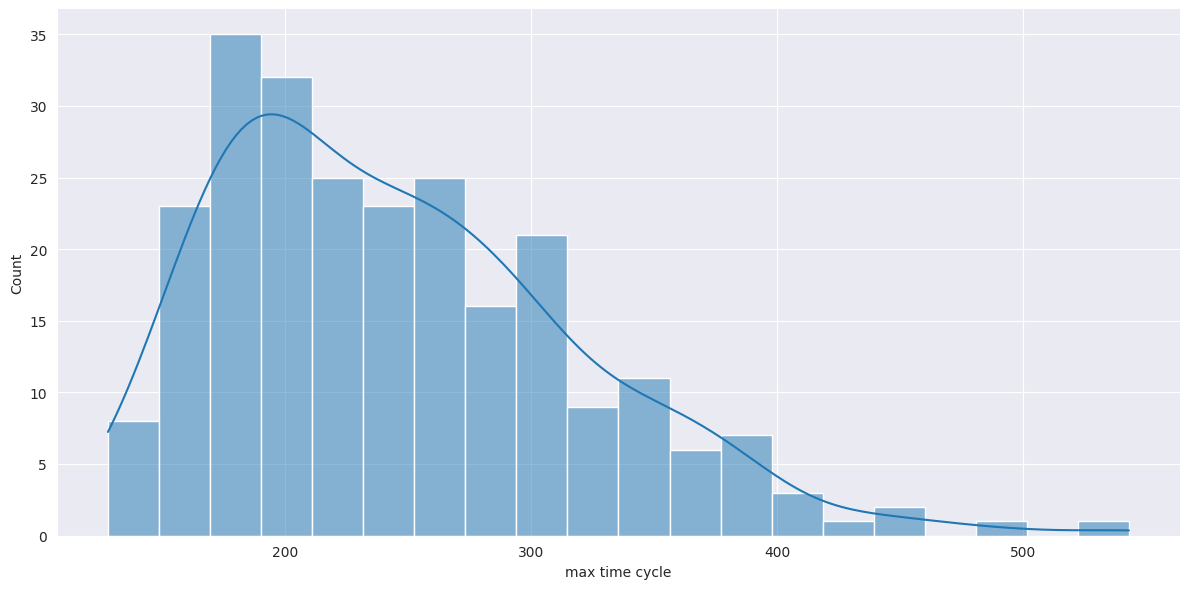

In [43]:
sns.displot(max_time_cycles['time_cycles'],kde=True,bins=20,height=6,aspect=2)
plt.xlabel('max time cycle')

In [44]:
#Add RUL column to the data
def add_RUL_column(df):
    train_grouped_by_unit = df.groupby(by='unit_number')
    max_time_cycles = train_grouped_by_unit['time_cycles'].max()
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1)
    return merged

In [45]:
train = add_RUL_column(train)

In [46]:
train[['unit_number','RUL']]

,unit_number,RUL
0,1,320
1,1,319
2,1,318
3,1,317
4,1,316
...,...,...
61244,249,4
61245,249,3
61246,249,2
61247,249,1


In [47]:
#Rul analysis
maxrul_u = train.groupby('unit_number').max().reset_index()
maxrul_u.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,321,42.0079,0.8420,100.0,518.67,643.50,1603.28,1422.53,14.62,...,2388.87,8184.95,10.9141,0.03,397,2388,100.0,39.58,23.8649,320
1,2,299,42.0079,0.8420,100.0,518.67,643.88,1599.51,1434.23,14.62,...,2388.37,8143.04,11.0337,0.03,396,2388,100.0,39.15,23.4692,298
2,3,307,42.0079,0.8420,100.0,518.67,643.45,1605.04,1425.73,14.62,...,2388.91,8188.39,10.8552,0.03,396,2388,100.0,39.51,23.7657,306
3,4,274,42.0080,0.8419,100.0,518.67,644.07,1605.47,1432.75,14.62,...,2389.42,8210.13,11.0113,0.03,397,2388,100.0,39.11,23.4354,273
4,5,193,42.0072,0.8418,100.0,518.67,643.76,1607.29,1430.47,14.62,...,2389.46,8187.83,11.0254,0.03,398,2388,100.0,38.96,23.4060,192


<Axes: >

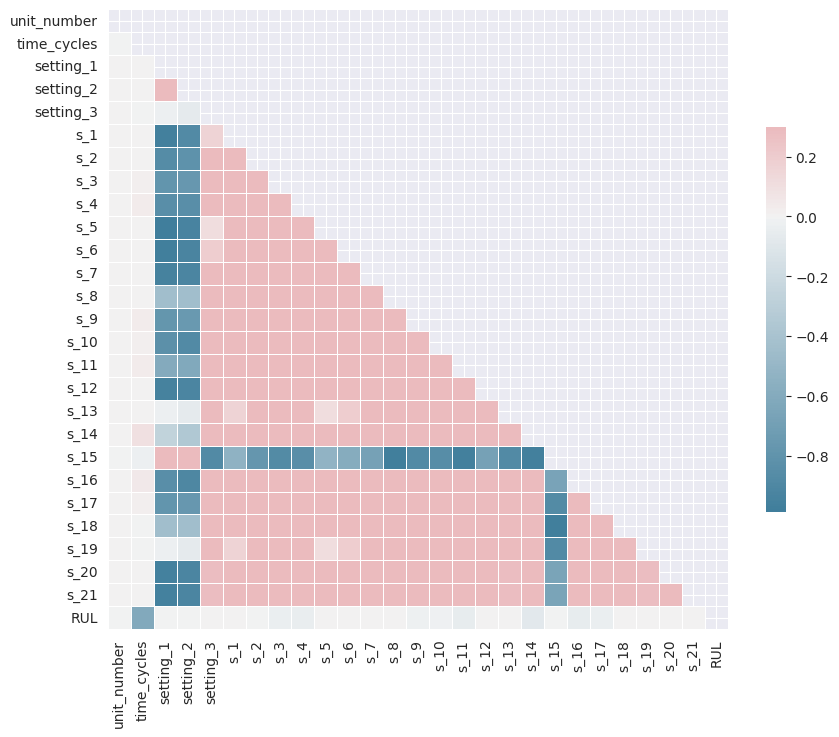

In [48]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(230, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [16]:
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
i=1
for x in dict_list :
    Sensor_dictionary['s_'+str(i)]=x
    i+=1
Sensor_dictionary

{'s_1': '(Fan inlet temperature) (◦R)',
 's_2': '(LPC outlet temperature) (◦R)',
 's_3': '(HPC outlet temperature) (◦R)',
 's_4': '(LPT outlet temperature) (◦R)',
 's_5': '(Fan inlet Pressure) (psia)',
 's_6': '(bypass-duct pressure) (psia)',
 's_7': '(HPC outlet pressure) (psia)',
 's_8': '(Physical fan speed) (rpm)',
 's_9': '(Physical core speed) (rpm)',
 's_10': '(Engine pressure ratio(P50/P2)',
 's_11': '(HPC outlet Static pressure) (psia)',
 's_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 's_13': '(Corrected fan speed) (rpm)',
 's_14': '(Corrected core speed) (rpm)',
 's_15': '(Bypass Ratio) ',
 's_16': '(Burner fuel-air ratio)',
 's_17': '(Bleed Enthalpy)',
 's_18': '(Required fan speed)',
 's_19': '(Required fan conversion speed)',
 's_20': '(High-pressure turbines Cool air flow)',
 's_21': '(Low-pressure turbines Cool air flow)'}

In [49]:
def plot_signal(df, Sensor_dic, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['unit_number'].unique():
        if (i % 10 == 0):   #For a better visualisation, we plot the sensors signals of 20 units only
            plt.plot('RUL', signal_name, data=df[df['unit_number']==i].rolling(10).mean())

    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(Sensor_dic[signal_name])
    plt.xlabel('Remaining Useful Life')
    plt.show()

In [18]:
for i in range(1,22):
    try:
        plot_signal(train, Sensor_dictionary,'s_'+str(i))
    except:
        pass

Output hidden; open in https://colab.research.google.com to view.

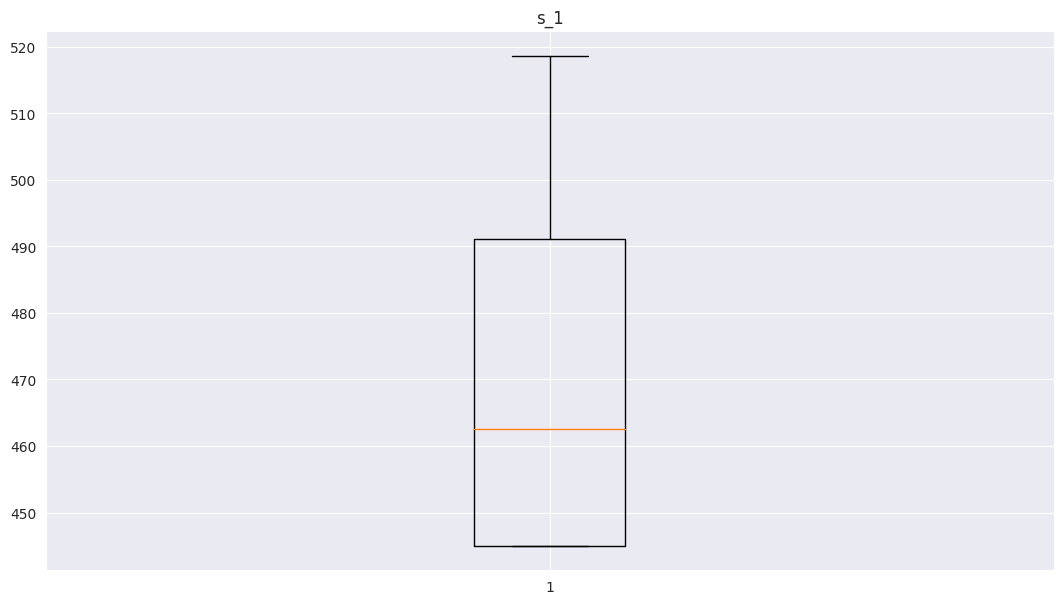

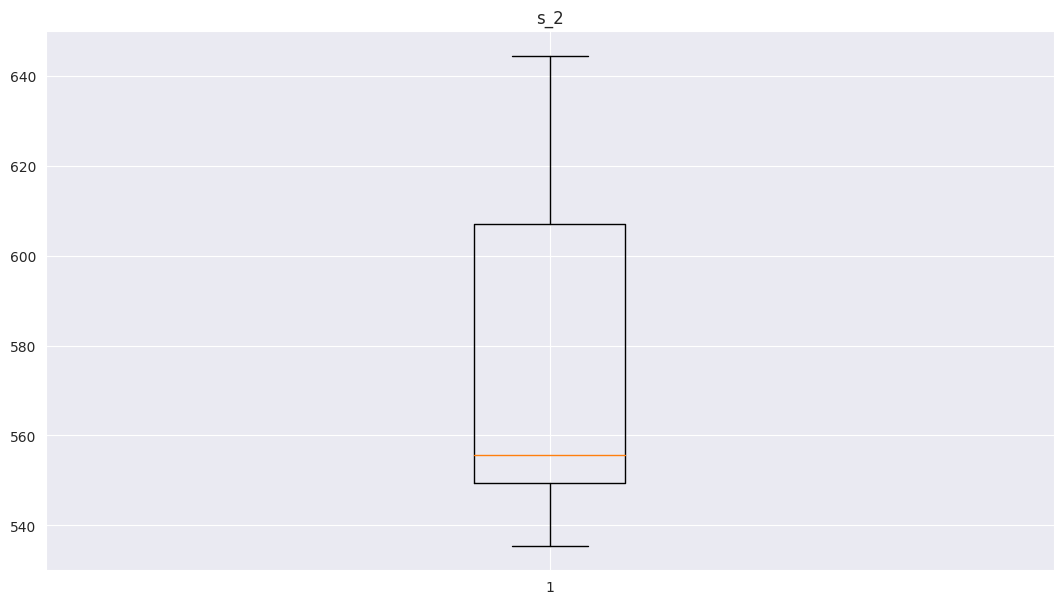

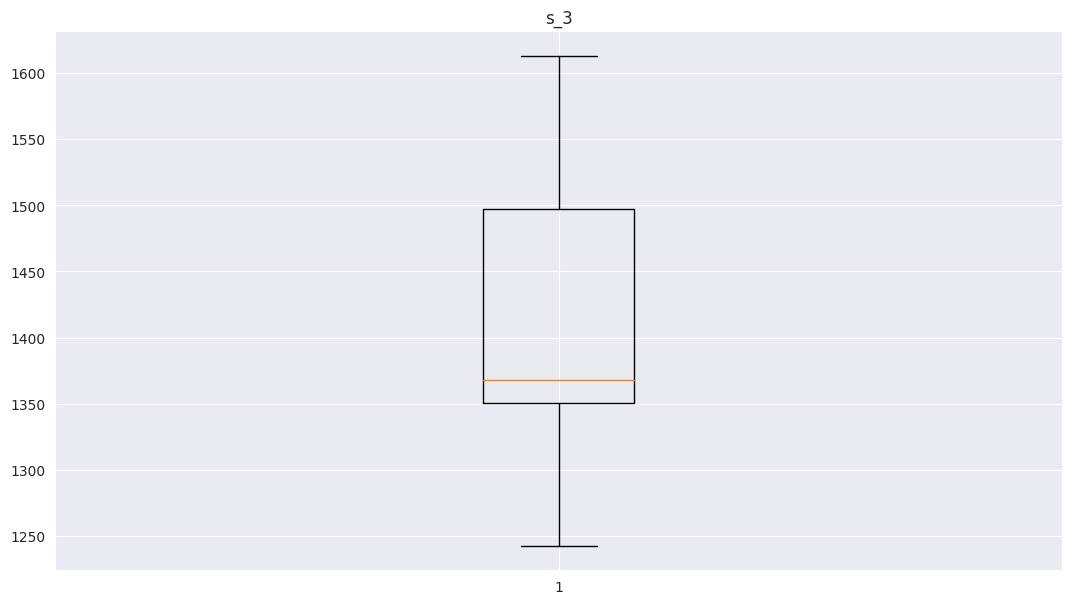

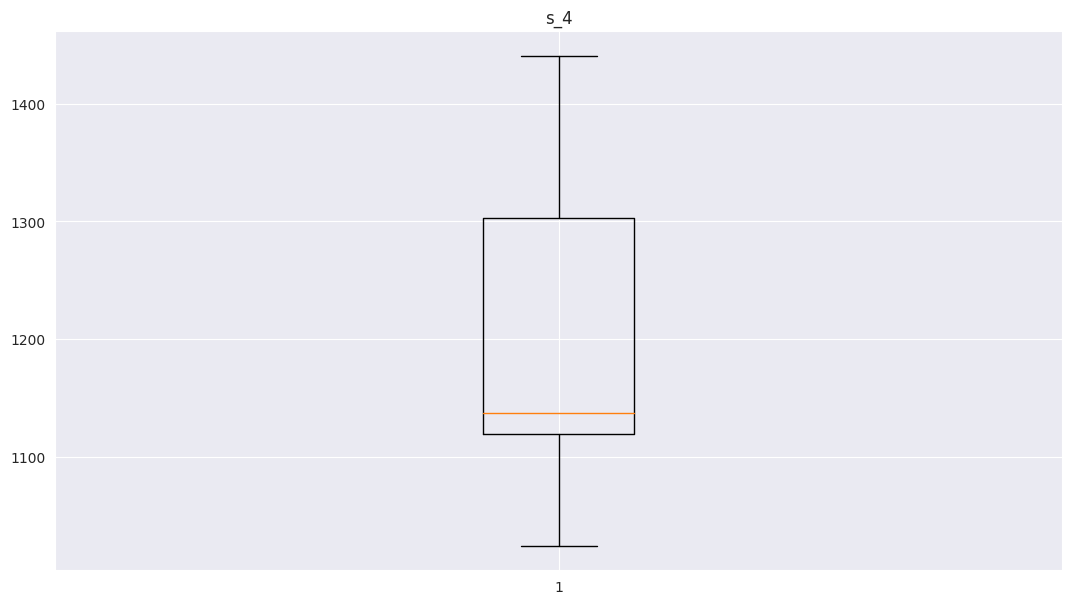

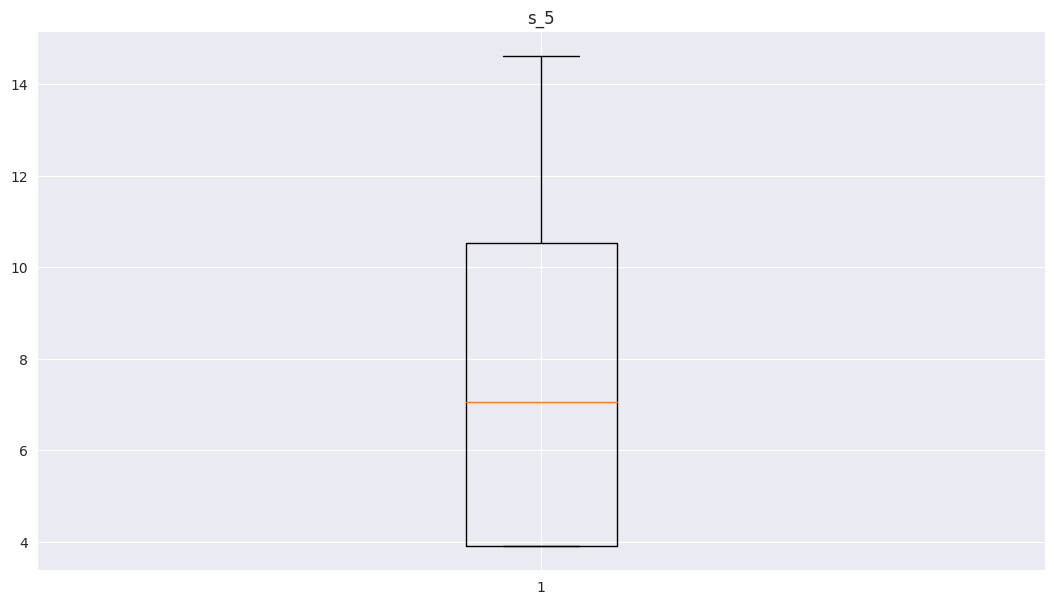

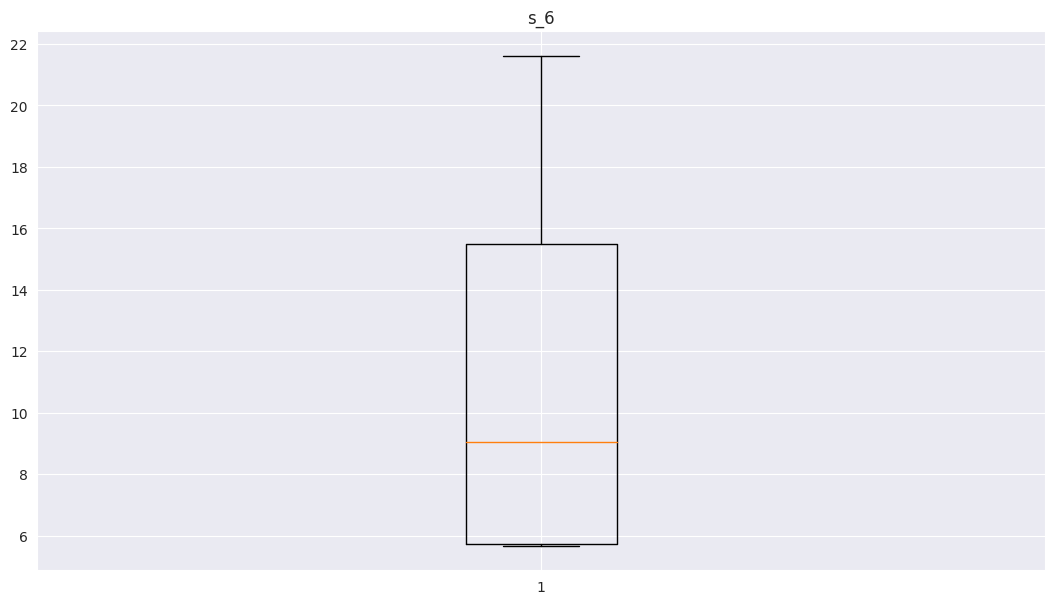

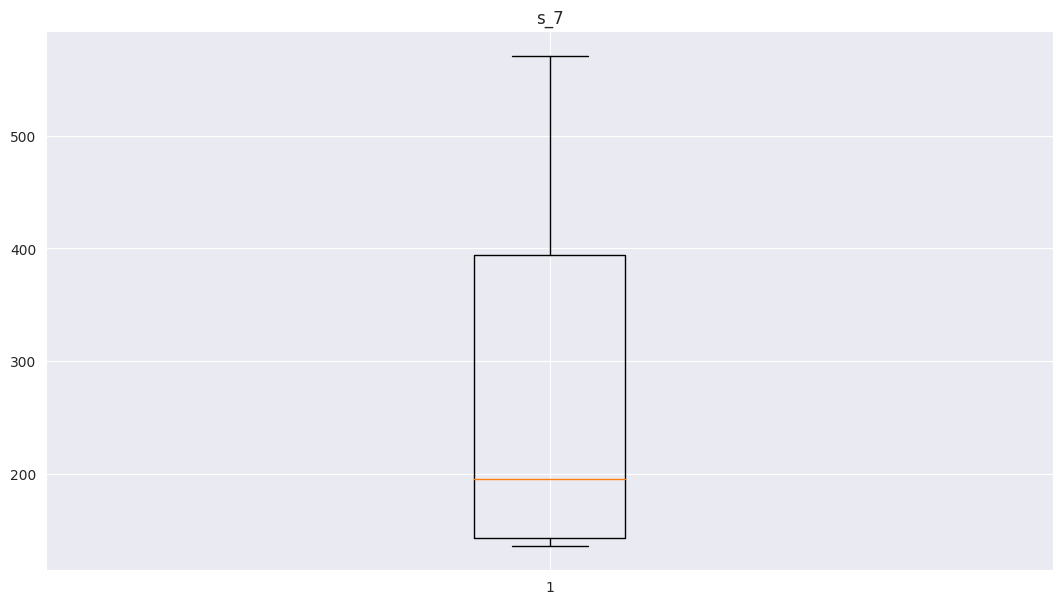

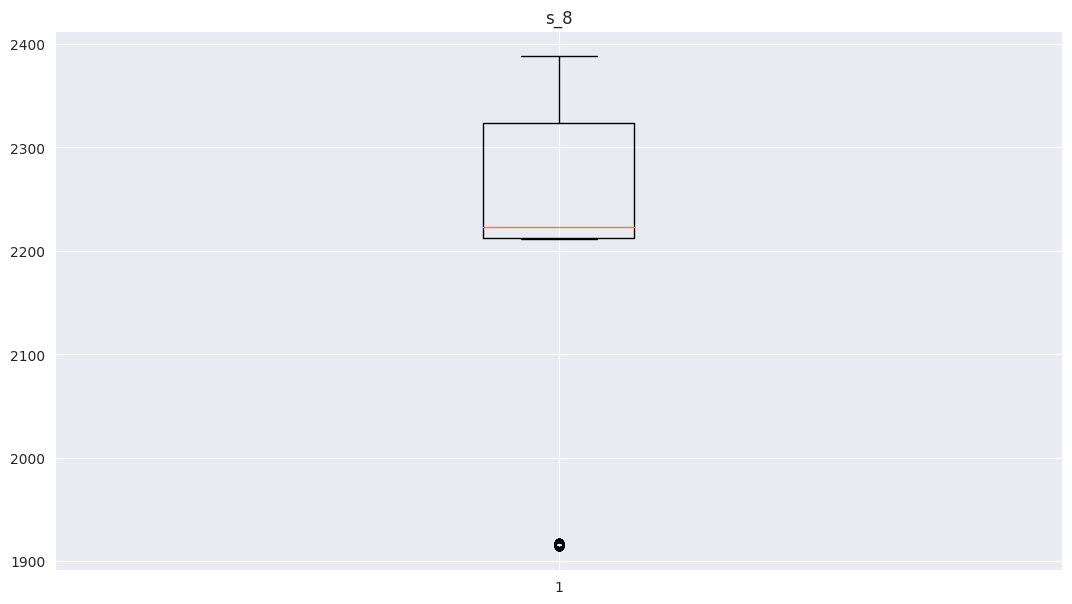

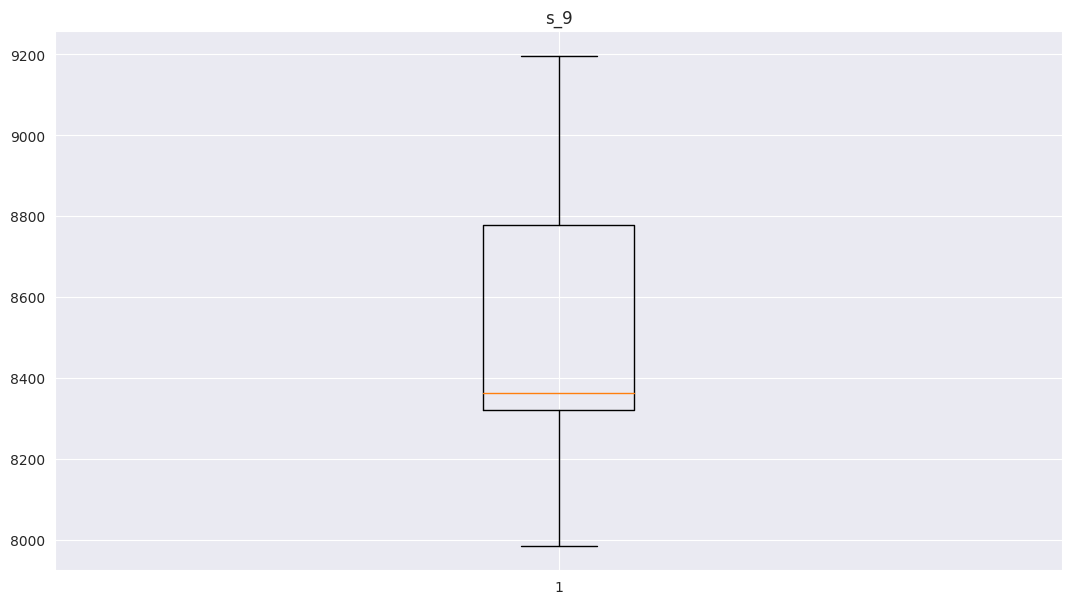

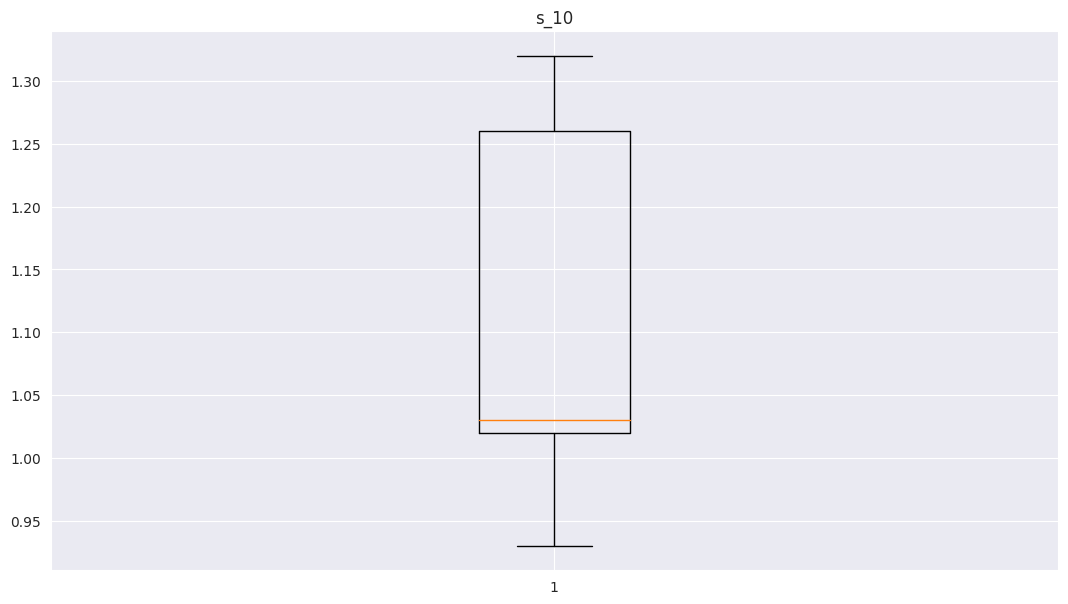

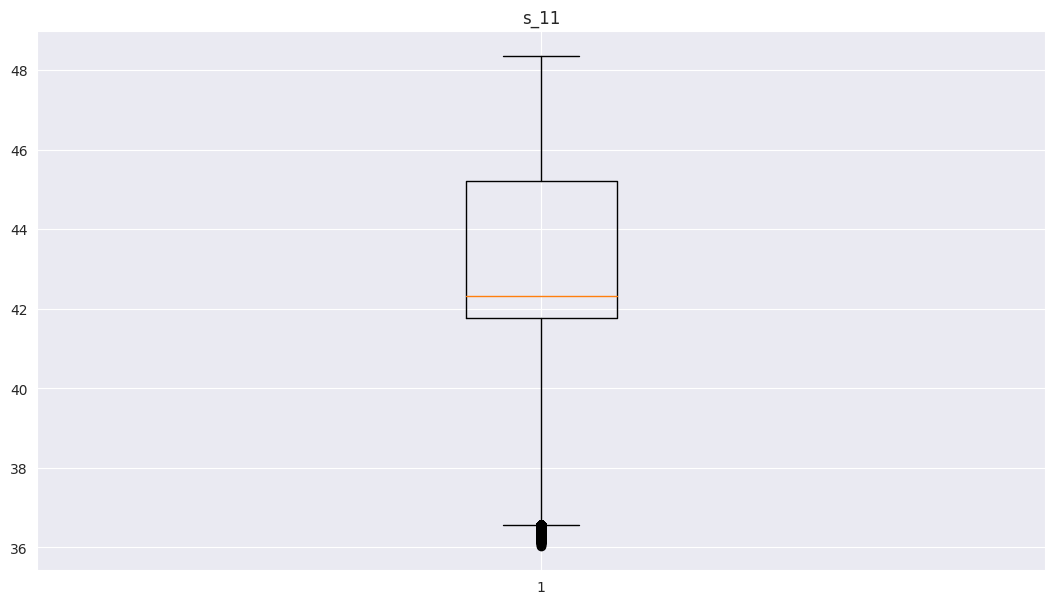

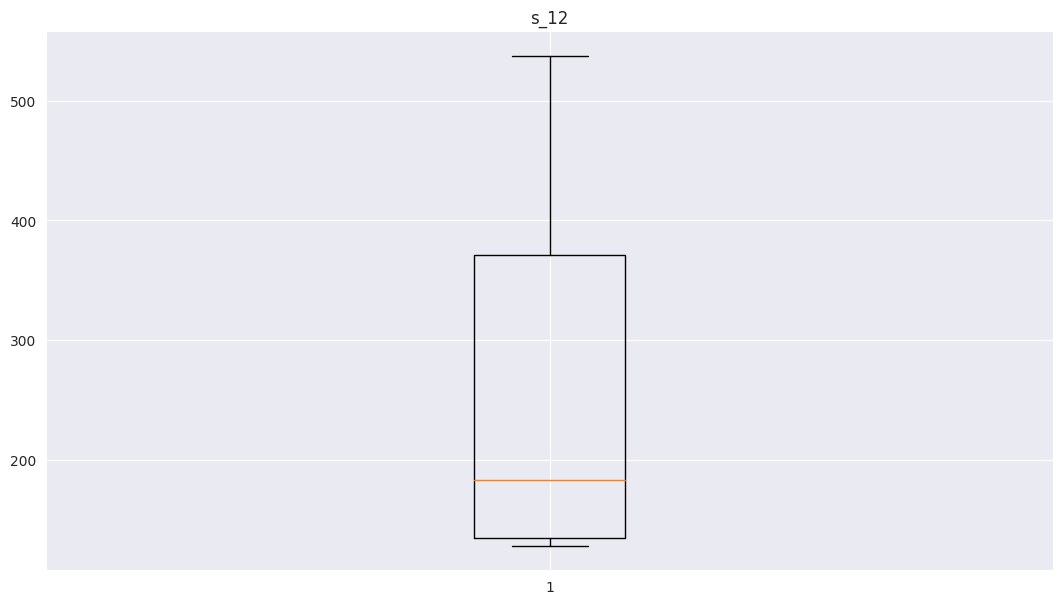

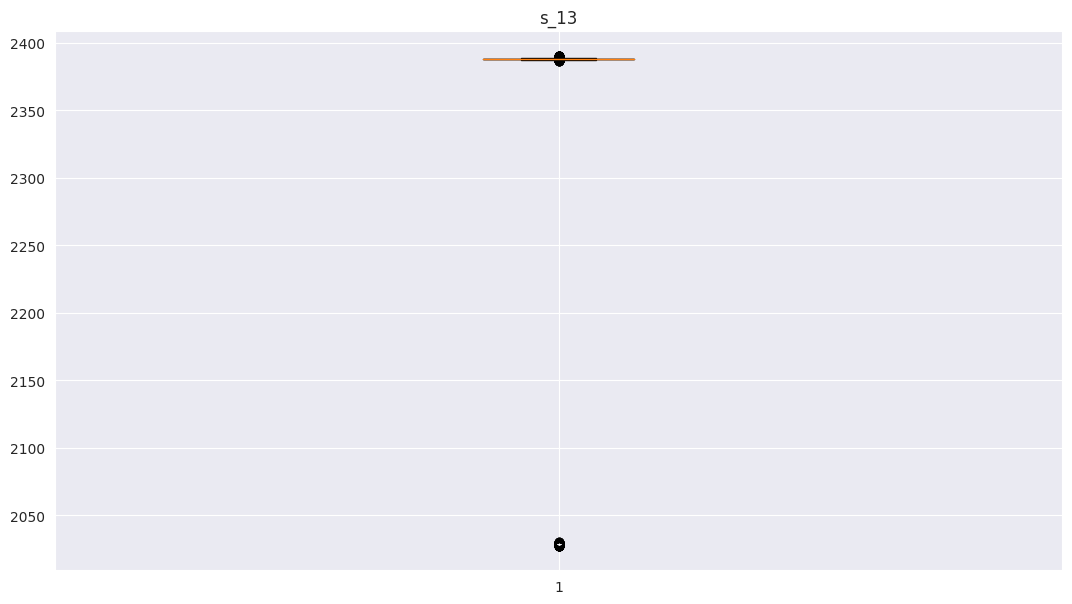

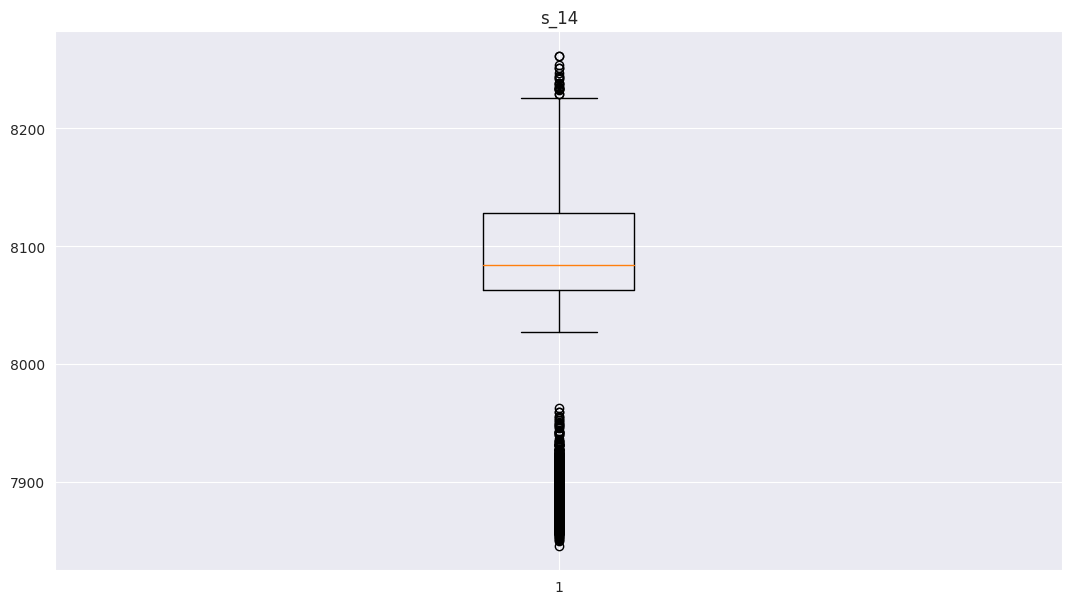

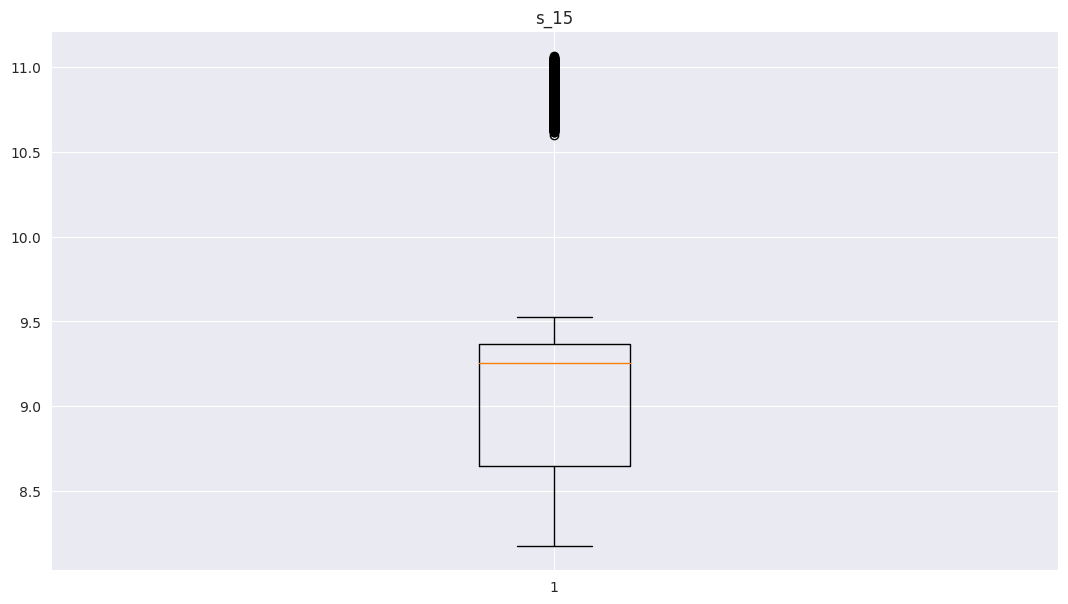

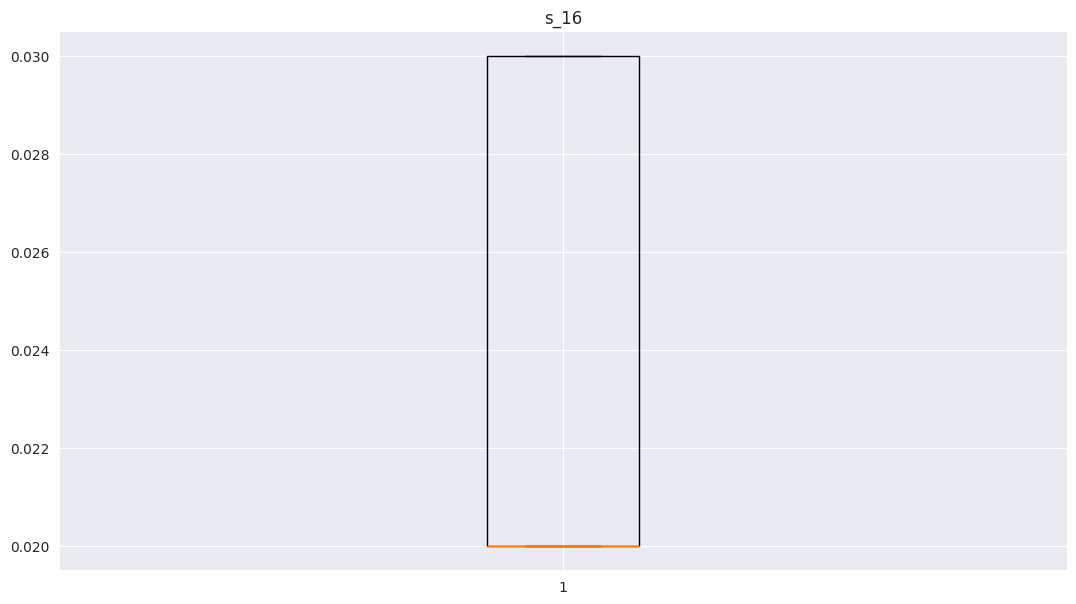

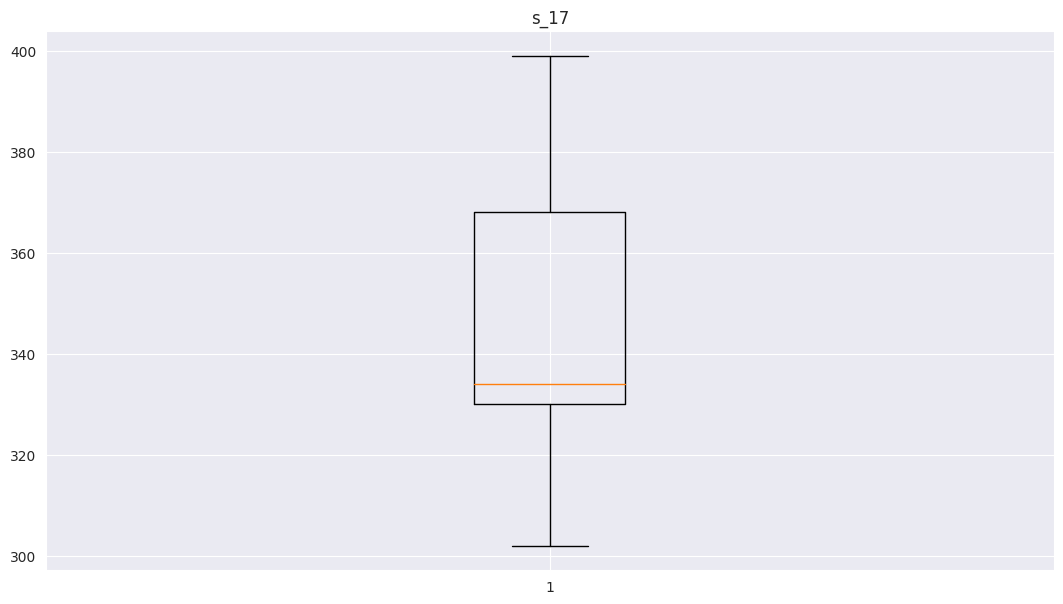

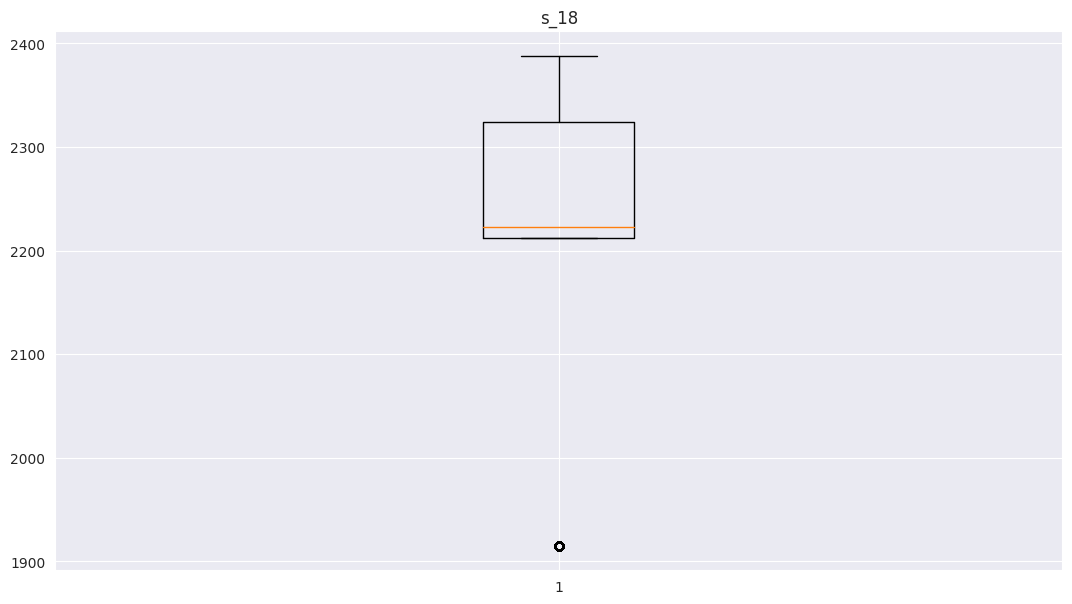

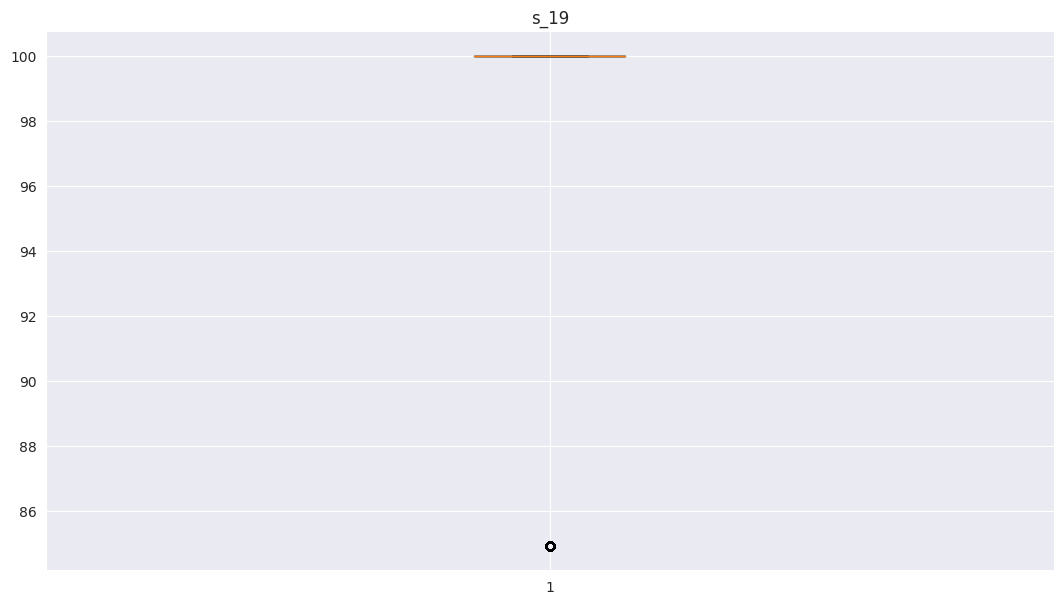

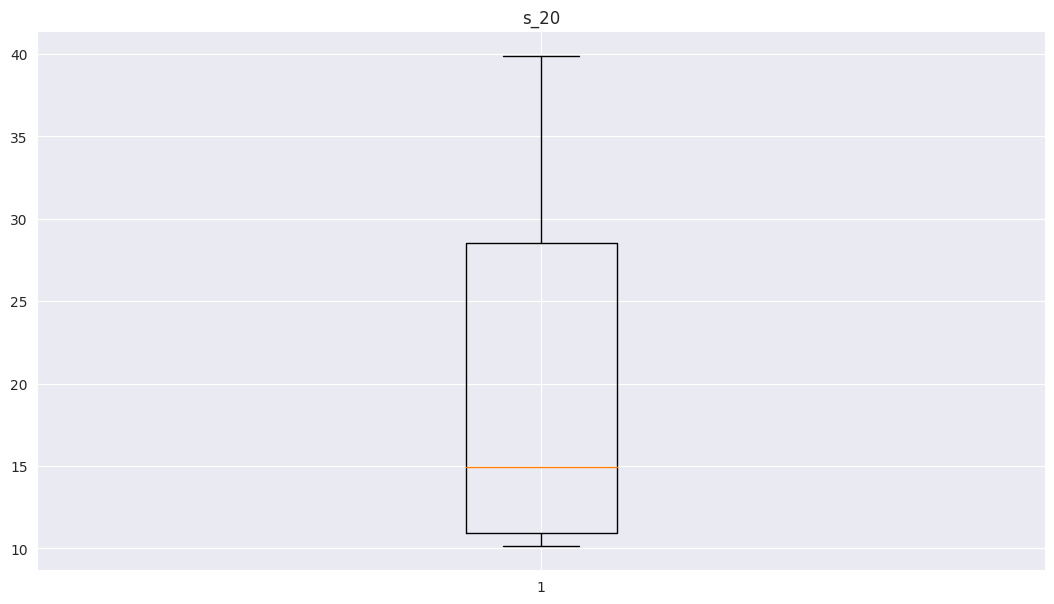

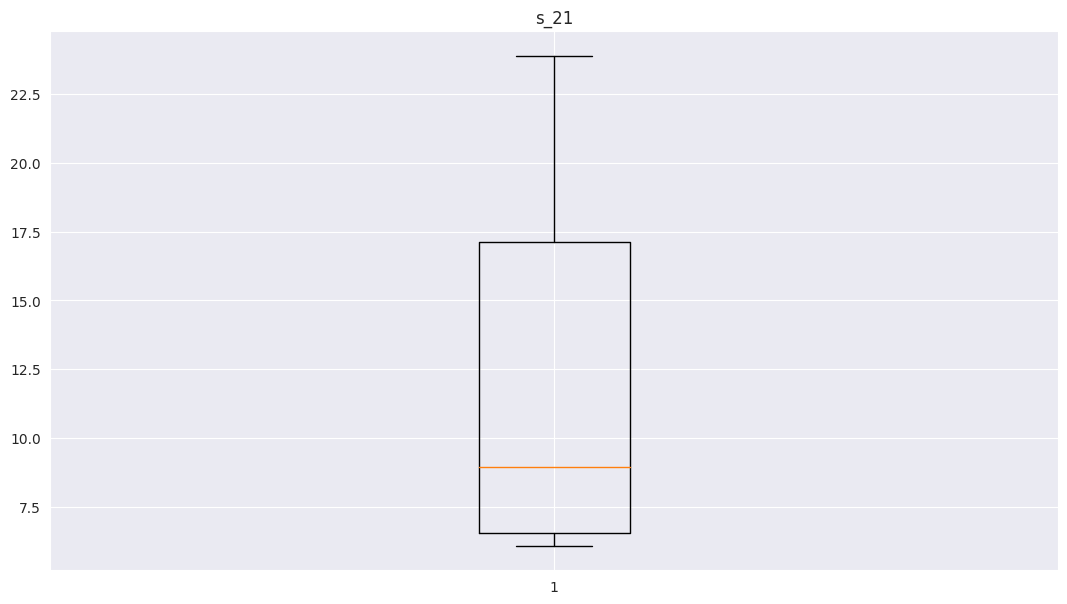

In [19]:
for x in sensor_names:
    plt.figure(figsize=(13,7))
    plt.boxplot(train[x])
    plt.title(x)
    plt.show()

In [50]:
train.loc[:,'s_1':].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,61249.0,472.882435,26.436832,445.0000,445.0000,462.5400,491.1900,518.6700
s_2,61249.0,579.420056,37.342647,535.4800,549.3300,555.7400,607.0700,644.4200
s_3,61249.0,1417.896600,106.167598,1242.6700,1350.5500,1367.6800,1497.4200,1613.0000
s_4,61249.0,1201.915359,119.327591,1024.4200,1119.4900,1136.9200,1302.6200,1440.7700
s_5,61249.0,8.031626,3.622872,3.9100,3.9100,7.0500,10.5200,14.6200
s_6,61249.0,11.589457,5.444017,5.6700,5.7200,9.0300,15.4800,21.6100
s_7,61249.0,283.328633,146.880210,136.1700,142.9200,194.9600,394.2800,570.8100
s_8,61249.0,2228.686034,145.348243,1914.7200,2211.9500,2223.0700,2323.9300,2388.6400
s_9,61249.0,8524.673301,336.927547,7984.5100,8320.5900,8362.7600,8777.2500,9196.8100
s_10,61249.0,1.096445,0.127681,0.9300,1.0200,1.0300,1.2600,1.3200


In [51]:
from sklearn.model_selection import train_test_split
drop_labels = index_names+setting_names
X_train=train.drop(columns=drop_labels).copy()
X_train, X_test, y_train, y_test=train_test_split(X_train,X_train['RUL'], test_size=0.3, random_state=42)

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Droping the target variable
X_train.drop(columns=['RUL'], inplace=True)
X_test.drop(columns=['RUL'], inplace=True)
#Scaling X_train and X_test
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)
#Conserve only the last occurence of each unit to match the length of y_valid
X_valid = valid.groupby('unit_number').last().reset_index().drop(columns=drop_labels)
#scaling X_valid
X_valid_s=scaler.fit_transform(X_valid)

array([[<Axes: title={'center': 's_2'}>, <Axes: title={'center': 's_3'}>,
        <Axes: title={'center': 's_4'}>, <Axes: title={'center': 's_7'}>],
       [<Axes: title={'center': 's_8'}>, <Axes: title={'center': 's_9'}>,
        <Axes: title={'center': 's_11'}>,
        <Axes: title={'center': 's_12'}>],
       [<Axes: title={'center': 's_13'}>,
        <Axes: title={'center': 's_14'}>,
        <Axes: title={'center': 's_15'}>,
        <Axes: title={'center': 's_17'}>],
       [<Axes: title={'center': 's_20'}>,
        <Axes: title={'center': 's_21'}>, <Axes: >, <Axes: >]],
      dtype=object)

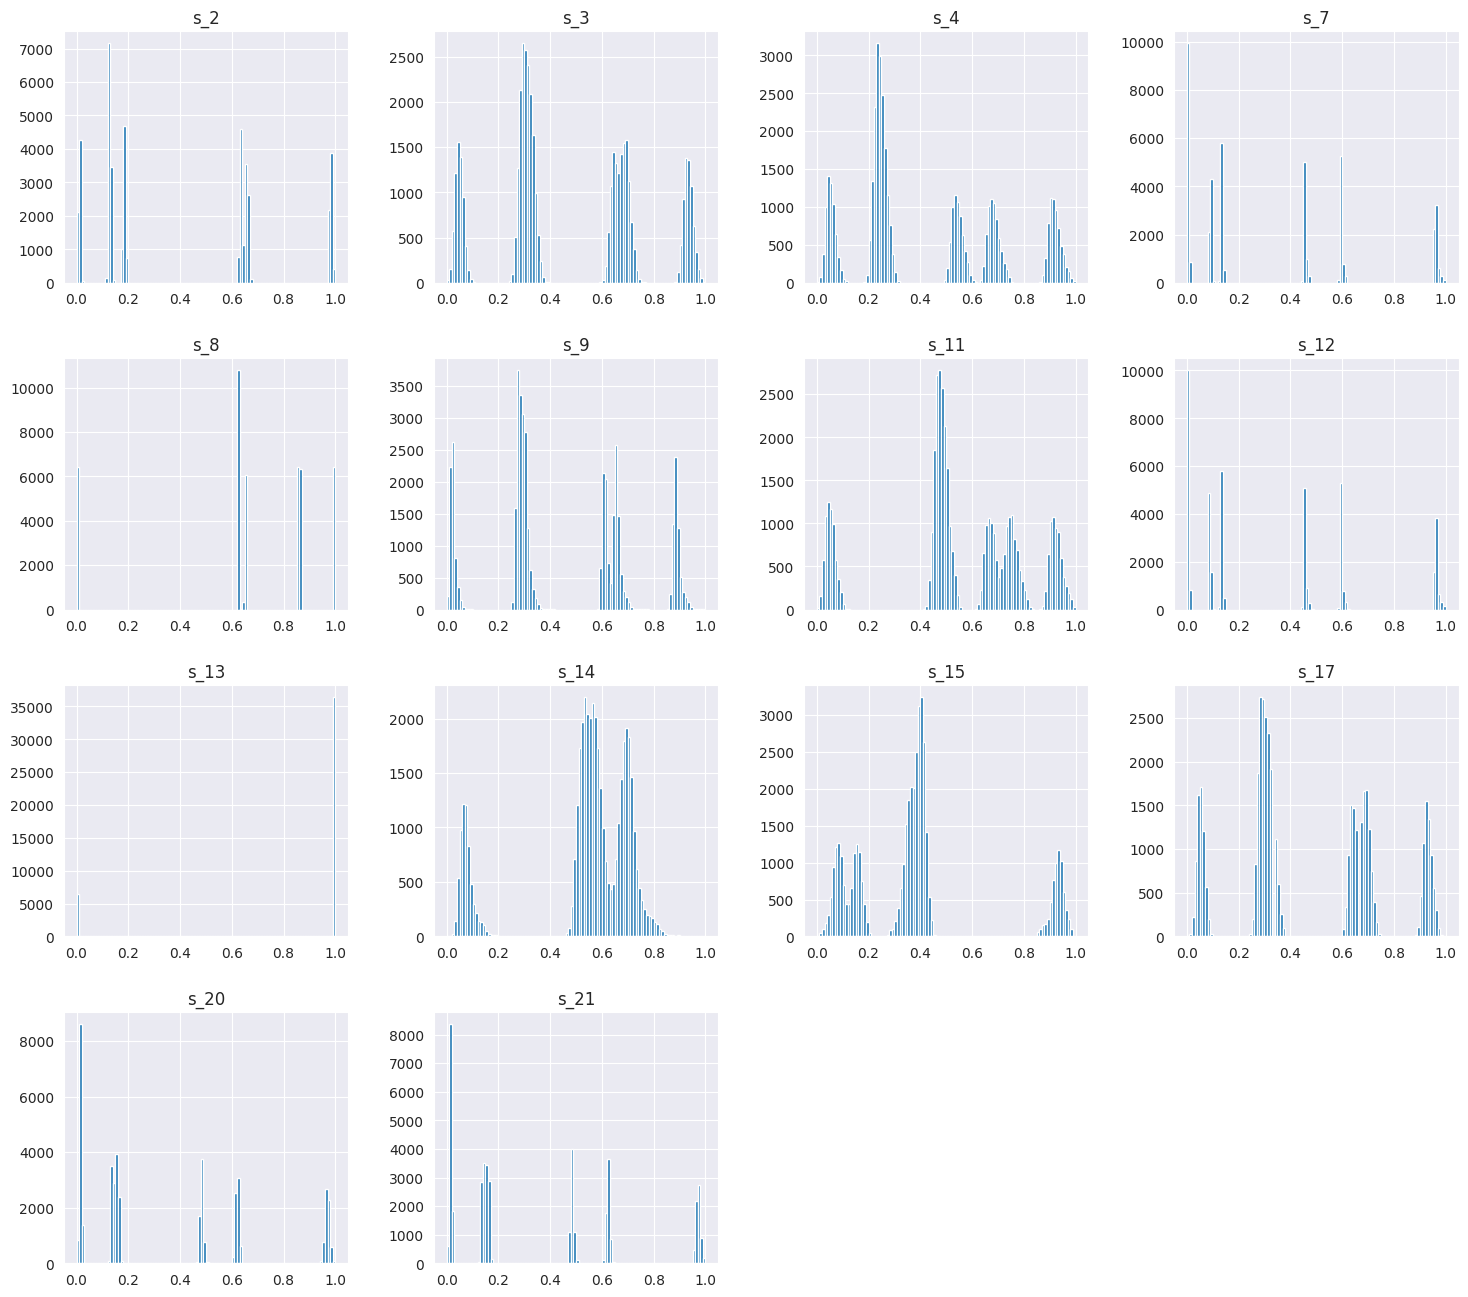

In [53]:
sensor_names=['s_{}'.format(i) for i in range(1,22) if i not in [1,5,6,10,16,18,19]]
pd.DataFrame(X_train_s,columns=['s_{}'.format(i) for i in range(1,22)])[sensor_names].hist(bins=100, figsize=(18,16))

#First Attempt Without removing useless sensors



In [24]:
#Linear regression
class Linear_Regression() :
    def __init__( self, lr=0.01, iterations=150 ) :
        self.lr = lr
        self.iterations = iterations
    def fit( self, X, Y ) :
        self.l, self.p = X.shape
        # weight initializer
        self.W = np.zeros( self.p )
        self.b = 0
        self.X = X
        self.Y = Y
        # gradientlearning
        for i in range( self.iterations ) :
            self.weight_updater()
        return self

    def weight_updater( self ) :
        Y_pred = self.predict( self.X )
        #  gradients
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.l
        db = - 2 * np.sum( self.Y - Y_pred ) / self.l
        # new weights assigned
        self.b = self.b - self.lr * db
        self.W = self.W - self.lr * dW
        return self

    def predict( self, X ) :
          # Y_pr=X.W+b
        return X.dot( self.W ) + self.b

In [25]:
#SVR

from sklearn.svm import SVR
import tensorflow as tf
regressor = SVR(kernel='rbf')

In [26]:
# Random forest

rf = RandomForestRegressor(max_features="sqrt", random_state=42)

In [27]:
#Defining evaluation functions

#R2 score & RMSE & MAER
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [28]:
#plot real data and the predicted one to make some comparison
def plot_predActual(y_test, y_test_hat):

    indices = np.arange(len(y_test_hat))
    wth= 0.6
    plt.figure(figsize=(70,30))
    true_values = [int(x) for x in y_test.values]
    predicted_values = list(y_test_hat)

    plt.bar(indices, true_values, width=wth,color='b', label='True RUL')
    plt.bar([i for i in indices], predicted_values, width=0.5*wth, color='r', alpha=0.7, label='Predicted RUL')

    plt.legend(prop={'size': 40})
    plt.tick_params(labelsize=40)

    plt.show()

In [29]:
# 1st attempt (all features, without historical data)

lr=Linear_Regression() #Instantiation
lr.fit(X=X_train_s, Y=y_train) #Fitting

y_lr_train = lr.predict(X_train_s) #Prediction on train data
evaluate(y_train,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_s)  #Prediction on test data
evaluate(y_test, y_lr_test, label='test')

y_lr_valid= lr.predict(X_valid_s) #Prediction on validation data
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:91.1799403983702, R2:-0.03433867631095189
test set RMSE:91.96051071378564, R2:-0.04220160190843214
valid set RMSE:70.04471075072563, R2:-0.6503595414274768


In [30]:
#SVM

regressor.fit(X_train_s, y_train) # fitting

y_svr_train = regressor.predict(X_train_s) #Prediction on train data
evaluate(y_train,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_s) #Prediction on test data
evaluate(y_test, y_svr_test, label='test')

y_svr_valid= lr.predict(X_valid_s)  #Prediction on validation data
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:82.07806715535051, R2:0.161856468171501
test set RMSE:82.39476212690415, R2:0.16334156111703801
valid set RMSE:70.04471075072563, R2:-0.6503595414274768


In [31]:
#Random Forest Regressor

# gridsearch goes here
rf.fit(X_train_s, y_train)
# predict and evaluate
y_rf_train = rf.predict(X_train_s)
evaluate(y_train,y_rf_train, label='train')

y_rf_test = rf.predict(X_test_s)
evaluate(y_test, y_rf_test, label='test')

y_rf_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_rf_valid, label='valid')

train set RMSE:20.65402411425521, R2:0.946927014840668
test set RMSE:68.58847256682671, R2:0.42023599262081046
valid set RMSE:60.33210330089344, R2:-0.22440419220771268


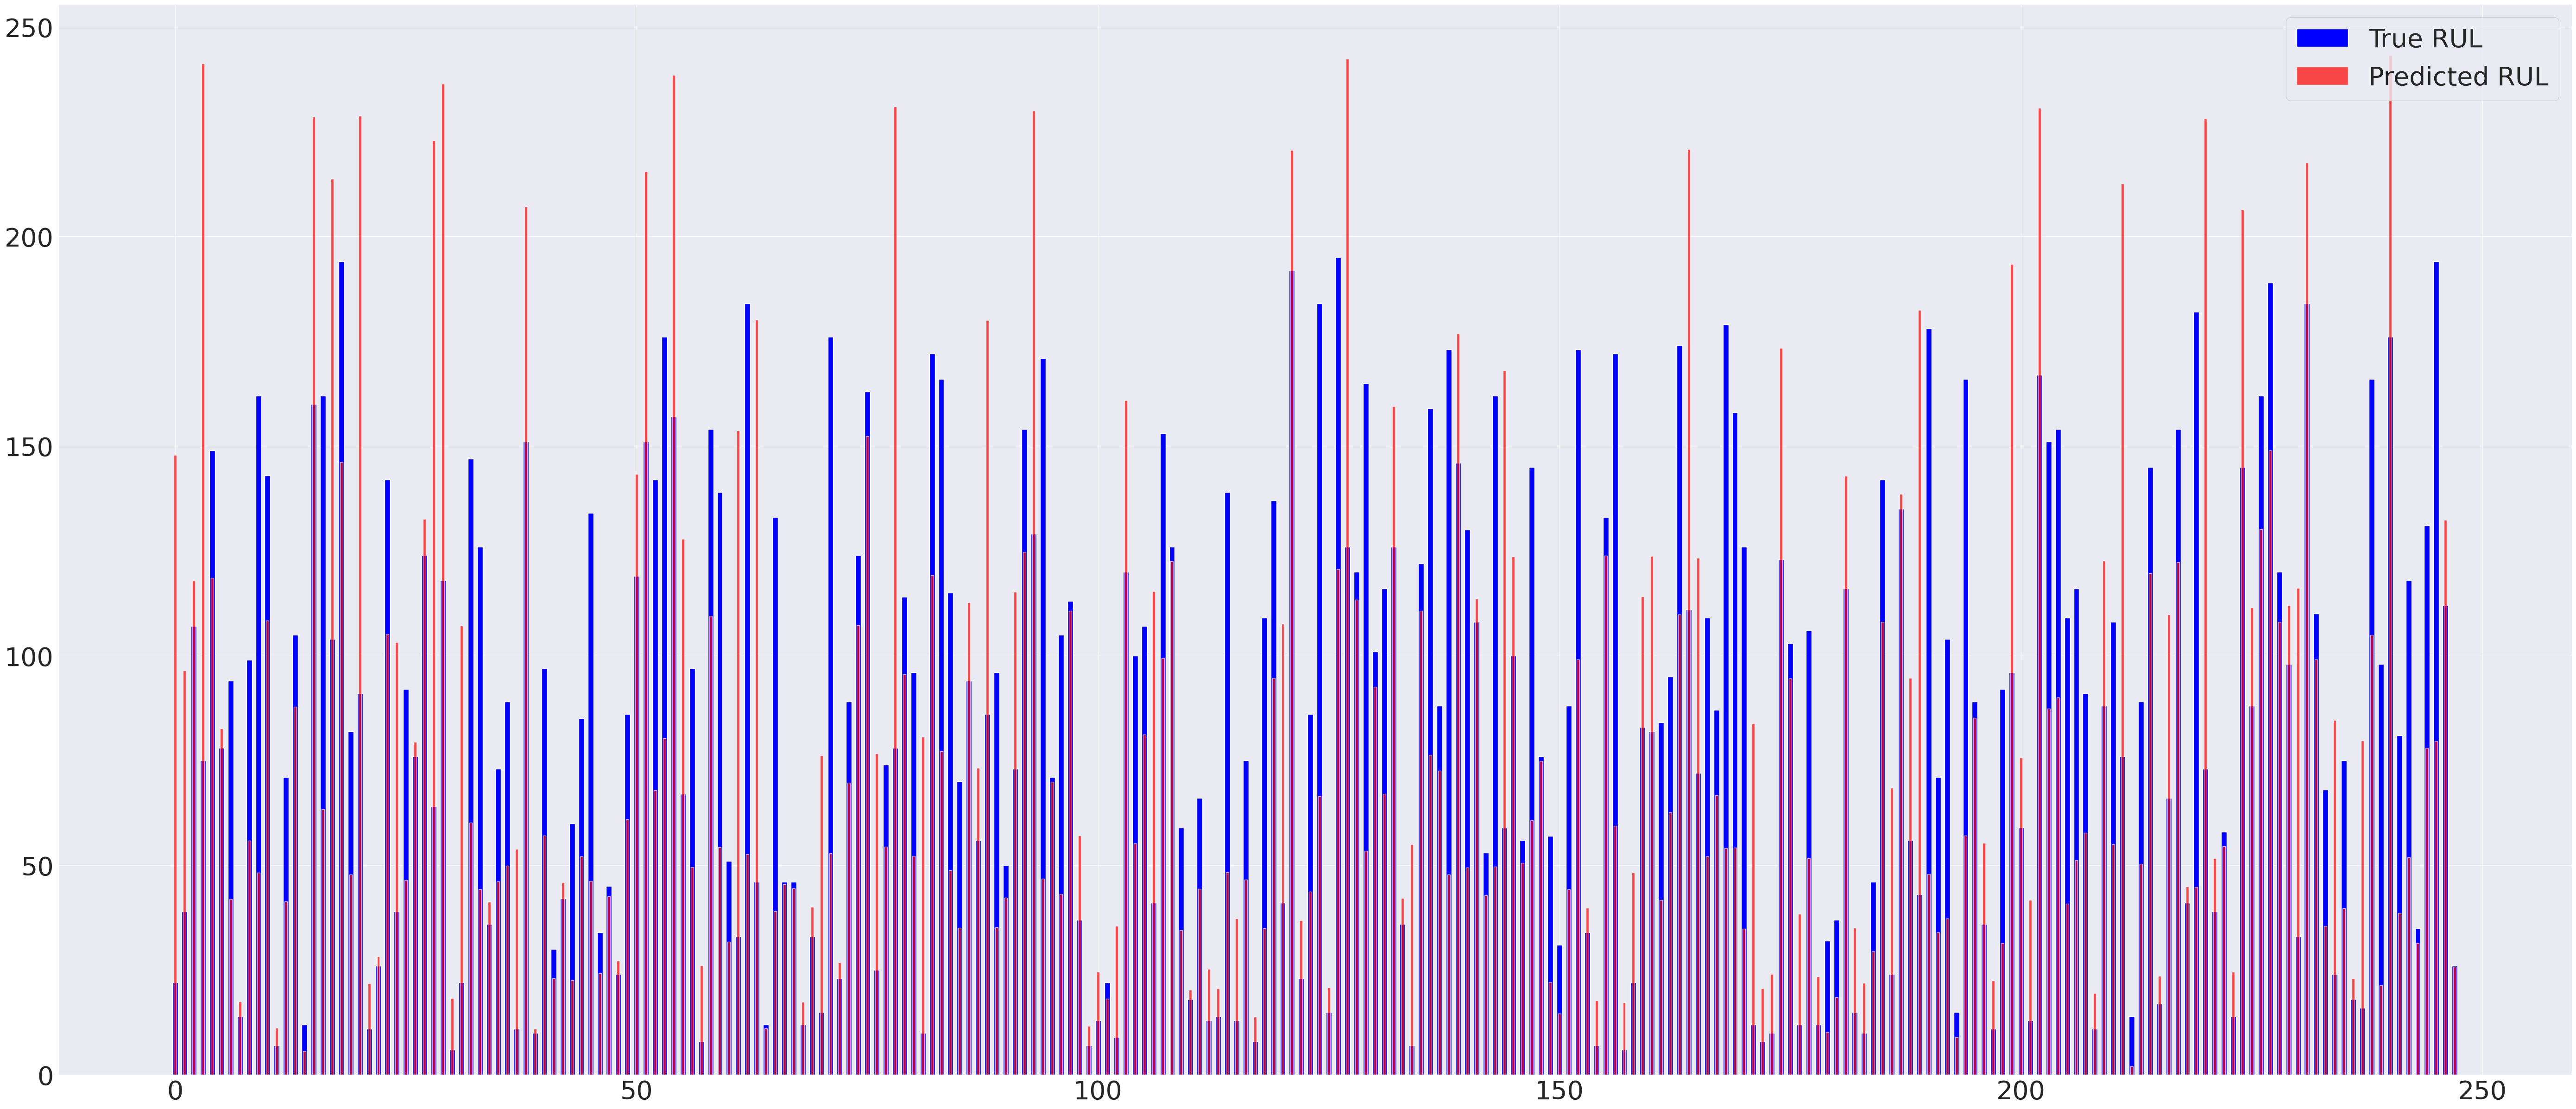

In [32]:
plot_predActual(y_valid, y_rf_valid)

#Second Attempt With Removing Useless Sensors
#### In this section we drop constant signals, and we noticed in the max_time_cycles plot that in most of the time the maximum value is in the interval [190,210], hence we will set the maximum RUL to 195 through RUL clipping, Considering that every RUL higher than 195 is equivalent to 195 will help in the prediction process as it reduces some overhead without affecting the main objective as 195 is already a high RUL.

In [54]:
print('maximum of y_train : ',y_train.max())
print('maximum of y_test : ',y_test.max())
print('maximum of y_valid : ',y_valid.max())

maximum of y_train :  541
maximum of y_test :  542
maximum of y_valid :  RUL    195
dtype: int64


In [ ]:
#I notice that the model overestimates the RUL

(array([4134., 3943., 3913., 3049., 1839.,  907.,  426.,  107.,   39.,
          18.]),
 array([  0. ,  54.2, 108.4, 162.6, 216.8, 271. , 325.2, 379.4, 433.6,
        487.8, 542. ]),
 <BarContainer object of 10 artists>)

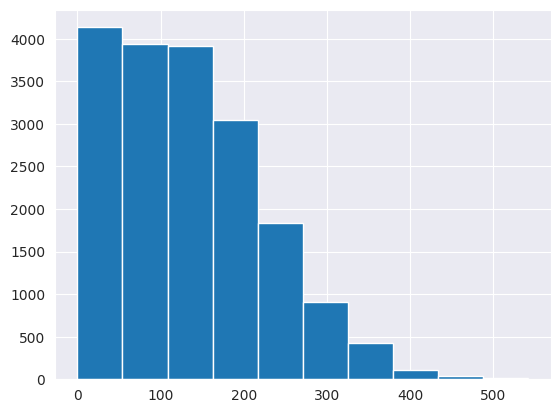

In [55]:
plt.hist(y_test)

In [56]:
drop_labels2=['s_1', 's_5','s_6','s_10',  's_11', 's_15', 's_16', 's_19', 's_20', 's_21', 's_17']
X_train_2=X_train.drop(columns=drop_labels2, axis=1) # drop the constant columns from the train dataset
X_test_2=X_test.drop(columns=drop_labels2, axis=1)  # drop the constant columns from the test dataset
X_train_2_s=scaler.fit_transform(X_train_2) #scaling X_train_2
X_test_2_s=scaler.fit_transform(X_test_2) #scaling X_test_2
y_train_clip=y_train.clip(upper=195)  #Clipping y_train to have 195 as the maximum value
X_valid_2=X_valid.drop(columns=drop_labels2, axis=1)  # drop the constant columns from the validation dataset
X_valid_2_s=scaler.fit_transform(X_valid_2) #scaling X_valid_2

In [57]:
#Linear Regression

lr=Linear_Regression()
lr.fit(X=X_train_2_s, Y=y_train_clip)

y_lr_train = lr.predict(X_train_2_s)
evaluate(y_train_clip,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_2_s)
evaluate(y_test, y_lr_test, label='test')

y_lr_valid = lr.predict(X_valid_2_s)
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:68.8302720066928, R2:-0.14243494385991595
test set RMSE:96.4427146822514, R2:-0.14627241235067223
valid set RMSE:63.891996595311575, R2:-0.3731588985756862


In [58]:
#SVR
regressor.fit(X_train_2_s, y_train)

y_svr_train = regressor.predict(X_train_2_s)
evaluate(y_train_clip,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_2_s)
evaluate(y_test, y_svr_test, label='test')

y_svr_valid = regressor.predict(X_valid_2_s)
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:54.8120446437332, R2:0.2755231502426514
test set RMSE:82.05937586451246, R2:0.17013890219708827
valid set RMSE:52.11445593151949, R2:0.08642481983059702


In [59]:
#Random Forest

rf.fit(X_train_2_s, y_train_clip)
# predict and evaluate
y_rf_train = rf.predict(X_train_2_s)
evaluate(y_train_clip,y_rf_train, label='train')

y_rf_test = rf.predict(X_test_2_s)
evaluate(y_test, y_rf_test, label='test')

y_rf_valid = rf.predict(X_valid_2_s)
evaluate(y_valid, y_rf_valid, label='valid')

train set RMSE:13.57822266889892, R2:0.9555411361991526
test set RMSE:81.41086654423349, R2:0.18320373680005653
valid set RMSE:61.43839440657661, R2:-0.2697189202431769


In [60]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=110, learning_rate=0.02, gamma=0, subsample=0.8,colsample_bytree=0.5, max_depth=3)
xgb.fit(X_train_2_s, y_train_clip)


y_xgb_train = xgb.predict(X_train_2_s)
evaluate(y_train_clip,y_xgb_train, label='train')

y_xgb_test = xgb.predict(X_test_2_s)
evaluate(y_test, y_xgb_test, label='test')

y_xgb_valid = xgb.predict(X_valid_2_s)
evaluate(y_valid, y_xgb_valid, label='valid')

train set RMSE:44.81690924772901, R2:0.5156533369776197
test set RMSE:93.46457306909815, R2:-0.07657190111356926
valid set RMSE:60.92880022126707, R2:-0.2487431777214939


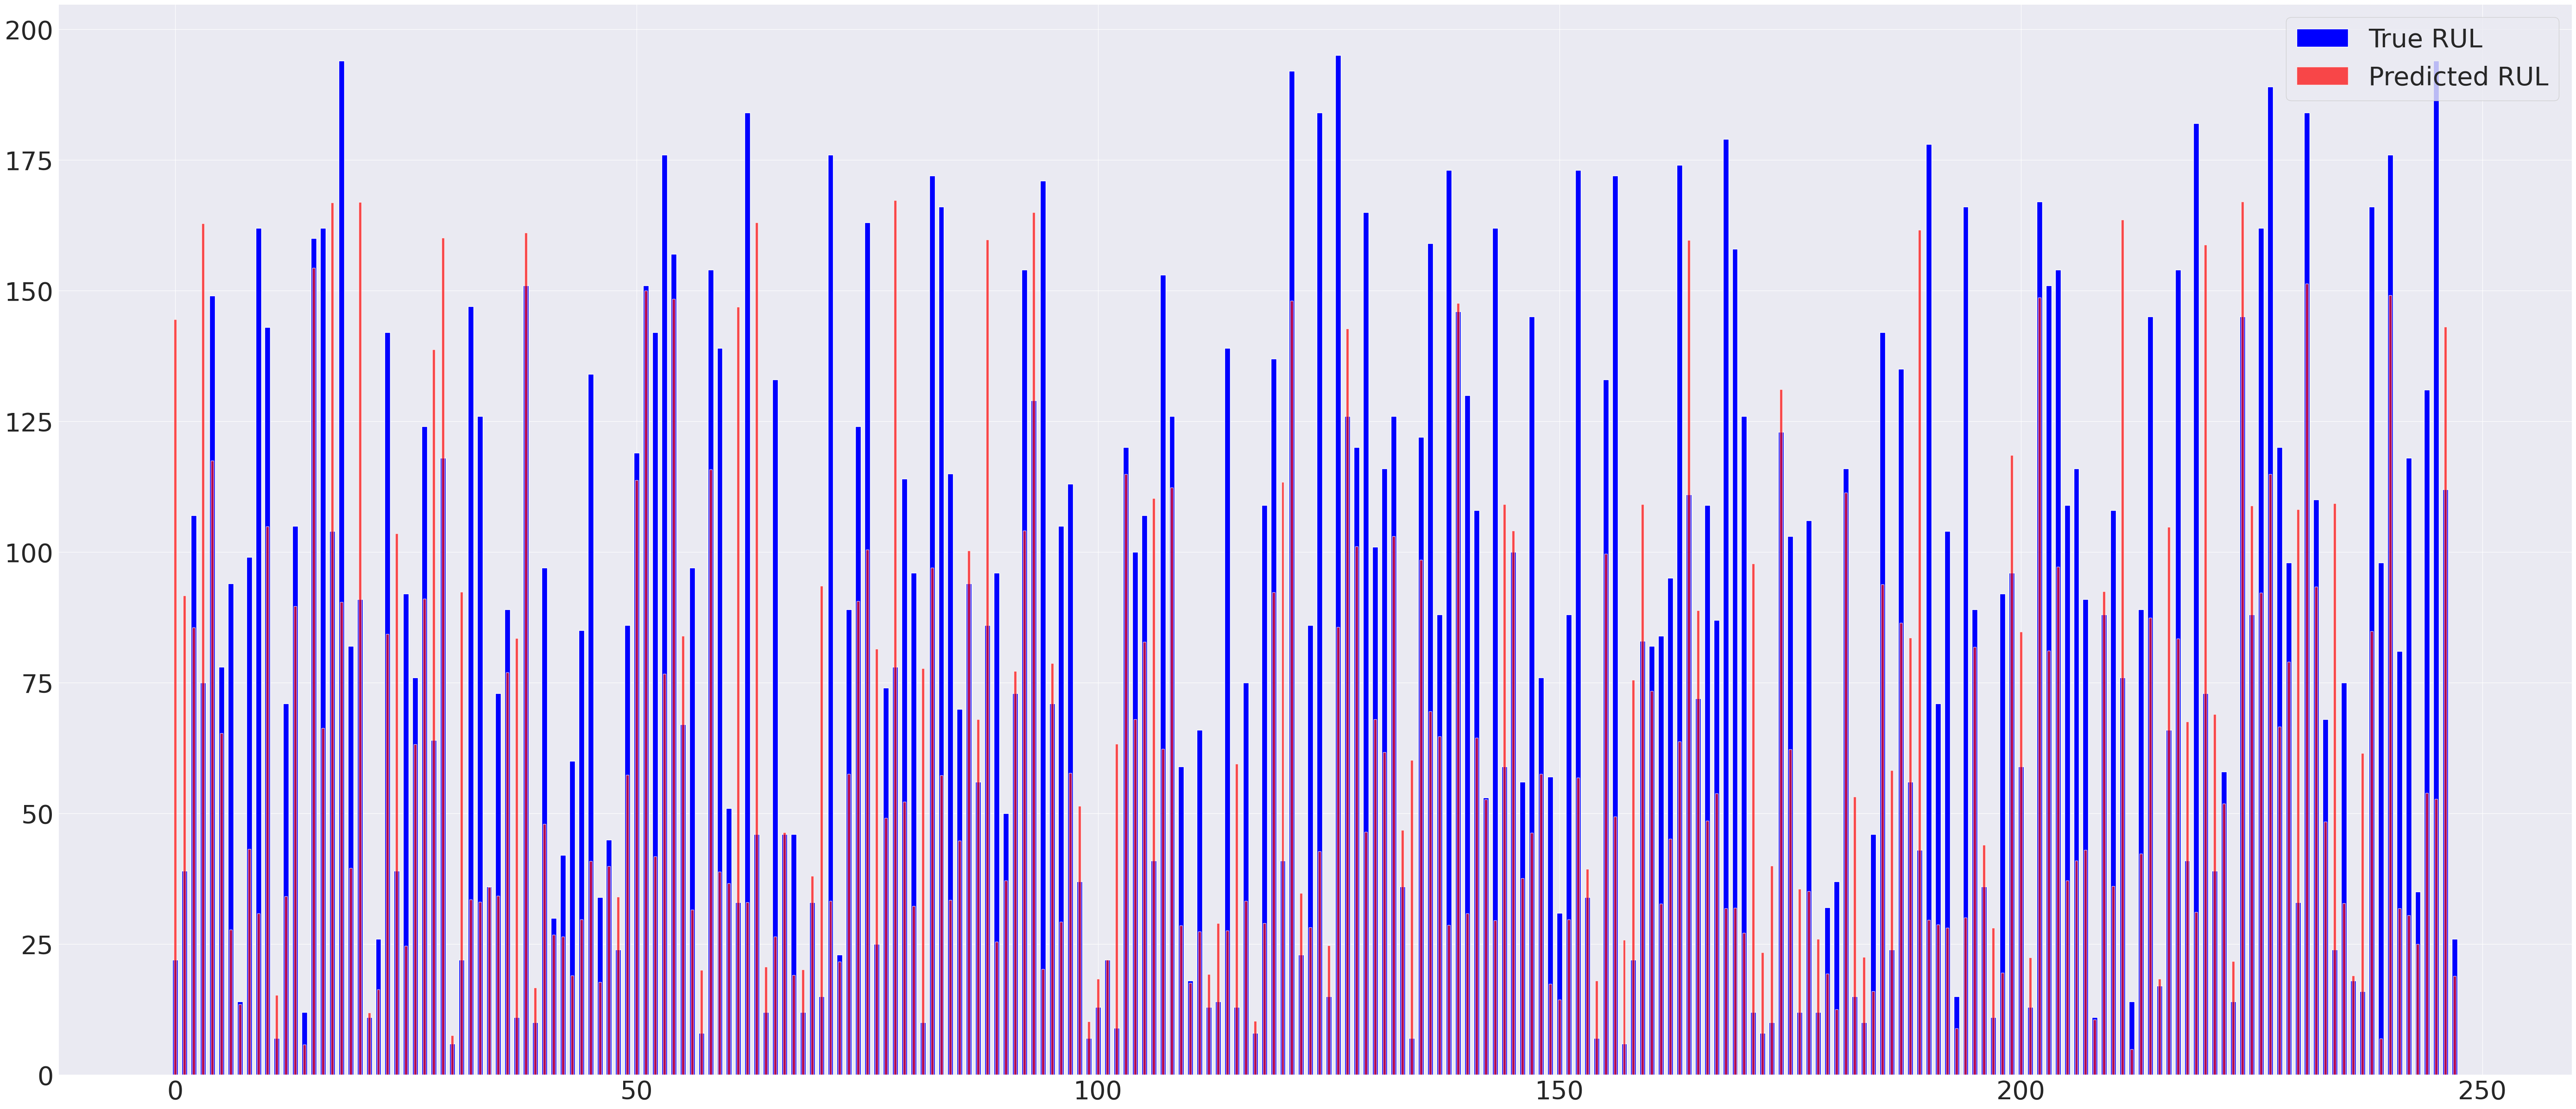

In [61]:
plot_predActual(y_valid, y_rf_valid)

# Third Attempt
#### In this section we are trying to discover a time series pattern in our features as we add to our data a new feature called 'rolling mean feature'. It's a equivalent to the mean value of a feature considering 10 time cycles. It will be computed for every feature.

In [66]:
df=train.copy()
for x in X_train_2.columns:
    df[x+'_rm']=0


df.columns

Index(['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3',
       's_1', 's_2', 's_3', 's_4', 's_5', 's_6', 's_7', 's_8', 's_9', 's_10',
       's_11', 's_12', 's_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19',
       's_20', 's_21', 'RUL', 's_2_rm', 's_3_rm', 's_4_rm', 's_7_rm', 's_8_rm',
       's_9_rm', 's_12_rm', 's_13_rm', 's_14_rm', 's_18_rm'],
      dtype='object')

In [67]:
drop_labels2=['s_1', 's_5','s_6','s_10',  's_16', 's_19', 's_15']
df=df.drop(columns=setting_names+drop_labels2+['RUL'], axis=1)

X_valid_3=valid.drop(columns=index_names+setting_names+drop_labels2, axis=1)

In [68]:
def update_rolling_mean(data, mask):
    for x, group in mask.groupby("unit_number"):
        for x in X_train_2.columns:
            data.loc[group.index[10:], x+"_rm"] = data.loc[group.index, x].rolling(10).mean()[10:]
            data.loc[group.index[:10], x+"_rm"] = data.loc[group.index[:10], x]

update_rolling_mean(df, df)
update_rolling_mean(X_valid_3, valid)

X_valid_3=X_valid_3.fillna(0)

In [69]:
df.iloc[-1,-14:]=df.iloc[-2,-14:]
X_valid_3.iloc[-1,-14:]=X_valid_3.iloc[-2,-14:]

In [70]:
train_tm=df

In [71]:
train_tm=train_tm.drop(columns=index_names, axis=1)

In [72]:
X_train_tm, X_test_tm, y_train_tm, y_test_tm=train_test_split(train_tm,train['RUL'].clip(upper=195), test_size=0.35, random_state=42)
X_train_tm_s=scaler.fit_transform(X_train_tm)
X_test_tm_s=scaler.fit_transform(X_test_tm)
X_val3=pd.concat([valid['unit_number'],X_valid_3],axis=1)
X_valid3 = X_val3.groupby('unit_number').last().reset_index().drop(columns=['unit_number'])
X_valid_s=scaler.fit_transform(X_valid3)

In [73]:
#Linear Regression

lr=Linear_Regression()
lr.fit(X_train_tm_s, y_train_tm)

y_lr_train = lr.predict(X_train_tm_s)
evaluate(y_train_tm,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_tm_s)
evaluate(y_test_tm, y_lr_test, label='test')

y_lr_valid = lr.predict(X_valid_s)
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:66.8993368163555, R2:-0.07505555646191264
test set RMSE:66.9483857513696, R2:-0.08110418548297105
valid set RMSE:63.30247124103364, R2:-0.34793579132639807


In [74]:
regressor.fit(X_train_tm_s, y_train_tm)

y_svr_train = regressor.predict(X_train_tm_s)
evaluate(y_train_tm,y_svr_train, label='train')

y_svr_test = regressor.predict(X_test_tm_s)
evaluate(y_test_tm, y_svr_test, label='test')

y_svr_valid = regressor.predict(X_valid_s)
evaluate(y_valid, y_svr_valid, label='valid')

train set RMSE:51.10325400907471, R2:0.37268684830301124
test set RMSE:50.763557452698834, R2:0.3784280211561246
valid set RMSE:51.29764366064437, R2:0.11483810729323973


In [ ]:
#Random forest

rf = RandomForestRegressor(max_features="sqrt", random_state=42)
rf.fit(X_train_tm_s, y_train_tm)
# predict and evaluate
y_hat_train = rf.predict(X_train_tm_s)
evaluate(y_train_tm,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_tm_s)
evaluate(y_test_tm, y_hat_test, label='test')
y_hat_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:12.467440817345496, R2:0.9578731422344164
test set RMSE:46.47598693978427, R2:0.40666707415224246
valid set RMSE:40.46693152568214, R2:0.4337888356424766


In [75]:
# Performing Grid search

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()
param_grid = {
    'n_estimators': [50,90,120],
    'max_depth' : [8,9,10],
}

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=3)

grid.fit(X_train_tm_s, y_train_tm)

print(grid.best_score_ , grid.best_params_)
#max_features=5,

0.6898915011781771 {'max_depth': 10, 'n_estimators': 120}


In [76]:
rf=RandomForestRegressor(n_estimators=90,  max_depth=10, n_jobs=-1, random_state=42)
rf.fit(X_train_tm_s, y_train_tm)
# predict and evaluate
y_hat_train = rf.predict(X_train_tm_s)
evaluate(y_train_tm,y_hat_train, label='train')
y_hat_test = rf.predict(X_test_tm_s)
evaluate(y_test_tm, y_hat_test, label='test')
y_hat_valid = rf.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:32.737299928107404, R2:0.7425617955877712
test set RMSE:47.85480279245069, R2:0.44761943392950365
valid set RMSE:67.82769136977257, R2:-0.5475402260228417


In [77]:
# Params found using Bayesian Optimisation
xgb = xgboost.XGBRegressor(n_estimators=50,
                           max_depth=6,
                           learning_rate=0.1,
                           reg_lambda=0.02,
                           gamma=0.4,
                           random_state=42)
xgb.fit(X_train_tm_s, y_train_tm)

# predict and evaluate
y_hat_train = xgb.predict(X_train_tm_s)
evaluate(y_train_tm, y_hat_train, 'train')

y_hat_test = xgb.predict(X_test_tm_s)
evaluate(y_test_tm, y_hat_test)

y_hat_valid = xgb.predict(X_valid_s)
evaluate(y_valid, y_hat_valid, label='valid')

train set RMSE:33.85325238226294, R2:0.724711492618783
test set RMSE:45.35583279616492, R2:0.5038035872103277
valid set RMSE:65.67725987533618, R2:-0.4509683072572708


In [78]:
from sklearn.model_selection import KFold
train_tm_cv=train_tm.copy()
y=train['RUL'].clip(upper=195)
scores_train=[]
scores_test=[]
scores_validation=[]

cv = KFold(n_splits=4, shuffle=True)
for train_index, test_index in cv.split(train_tm) :
    print("Index du train : ", train_index, "\n")
    print("Index de test : ", test_index)
    X_train, X_test, y_train, y_test = train_tm.iloc[train_index,:], train_tm.iloc[test_index,:],y[train_index], y[test_index]
    regressor.fit(scaler.fit_transform(X_train), y_train)
    y_hat_train = regressor.predict(scaler.fit_transform(X_train))
    evaluate(y_train,y_hat_train, label='train')
    y_hat_test = regressor.predict(scaler.fit_transform(X_test))
    evaluate(y_test, y_hat_test, label='test')
    y_hat_valid = regressor.predict(scaler.fit_transform(X_valid3))
    evaluate(y_valid, y_hat_valid, label='valid')


Index du train :  [    0     1     2 ... 61245 61246 61248] 

Index de test :  [    5     6     7 ... 61233 61235 61247]
train set RMSE:49.918577711073645, R2:0.40095234631799614
test set RMSE:50.62296483404693, R2:0.3823428783748972
valid set RMSE:50.950339432375, R2:0.1267832872437552
Index du train :  [    0     1     2 ... 61244 61246 61247] 

Index de test :  [    9    23    24 ... 61239 61245 61248]
train set RMSE:49.90043036634115, R2:0.40233691296982843
test set RMSE:49.85500758593354, R2:0.39812843555255484
valid set RMSE:50.65648262751146, R2:0.13682681990731216
Index du train :  [    2     3     5 ... 61245 61247 61248] 

Index de test :  [    0     1     4 ... 61241 61242 61246]
train set RMSE:50.01386275815826, R2:0.39795724793564513
test set RMSE:49.972681398849204, R2:0.4002533012631233
valid set RMSE:51.17105881429329, R2:0.11920126420405497
Index du train :  [    0     1     4 ... 61246 61247 61248] 

Index de test :  [    2     3    13 ... 61240 61243 61244]
train set

<BarContainer object of 24 artists>

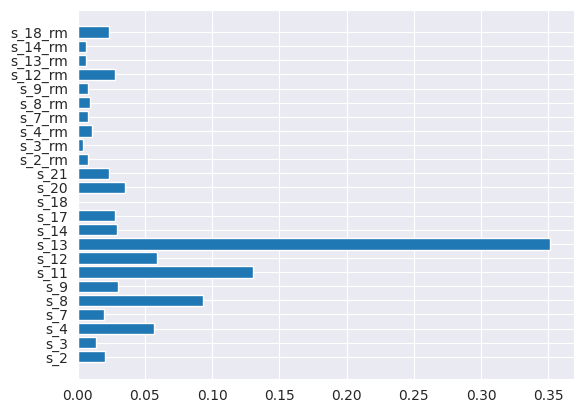

In [79]:
#BEST FEATURE FOR XGB MODEL
xgb.fit(X_train_tm_s, y_train_tm)
plt.barh(train_tm.columns, xgb.feature_importances_)

<BarContainer object of 24 artists>

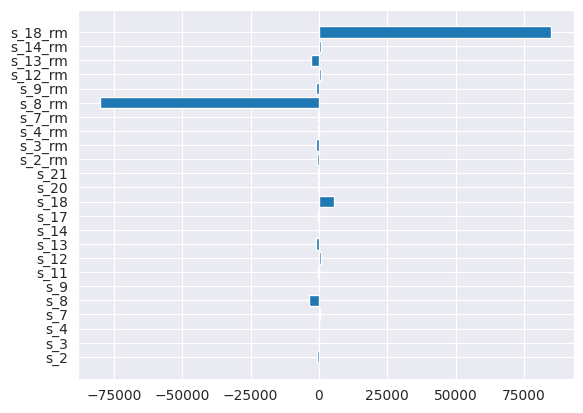

In [80]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=X_train_tm_s, y=y_train_tm)
plt.barh(X_train_tm.columns, model.coef_)

<BarContainer object of 24 artists>

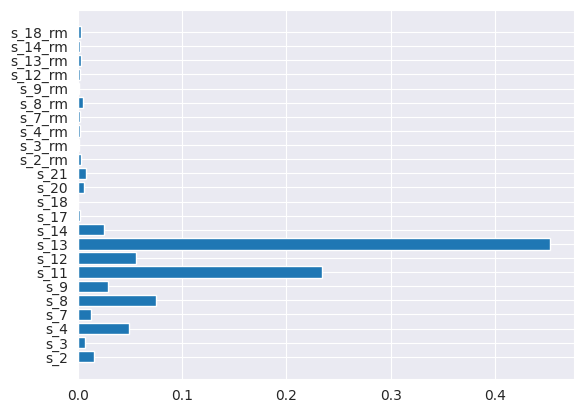

In [81]:
#BEST FEATURE FOR RF MODEL
rf.fit(X_train_tm_s, y_train_tm)
plt.barh(train_tm.columns, rf.feature_importances_)

In [82]:
dftm= pd.concat([train['unit_number'],train_tm,train['RUL']],axis=1)

dftm

,unit_number,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,...,s_3_rm,s_4_rm,s_7_rm,s_8_rm,s_9_rm,s_12_rm,s_13_rm,s_14_rm,s_18_rm,RUL
0,1,549.68,1343.43,1112.93,137.36,2211.86,8311.32,41.69,129.78,2387.99,...,1343.430,1112.930,137.360,2211.860,8311.320,129.780,2387.990,8074.830,2212.0,320
1,1,606.07,1477.61,1237.50,332.10,2323.66,8713.60,43.94,312.59,2387.73,...,1477.610,1237.500,332.100,2323.660,8713.600,312.590,2387.730,8046.130,2324.0,319
2,1,548.95,1343.12,1117.05,138.18,2211.92,8306.69,41.66,129.62,2387.97,...,1343.120,1117.050,138.180,2211.920,8306.690,129.620,2387.970,8066.620,2212.0,318
3,1,548.70,1341.24,1118.03,137.98,2211.88,8312.35,41.68,129.80,2388.02,...,1341.240,1118.030,137.980,2211.880,8312.350,129.800,2388.020,8076.050,2212.0,317
4,1,536.10,1255.23,1033.59,174.82,1915.22,7994.94,36.48,164.11,2028.08,...,1255.230,1033.590,174.820,1915.220,7994.940,164.110,2028.080,7865.800,1915.0,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,605.33,1516.36,1315.28,404.59,2319.66,8840.16,46.08,380.16,2388.73,...,1397.296,1180.648,223.367,2216.531,8473.391,210.340,2352.626,8113.157,2216.0,4
61245,249,643.42,1598.92,1426.77,567.59,2388.47,9117.12,48.04,535.02,2388.46,...,1406.747,1191.407,239.946,2223.439,8502.405,225.941,2352.607,8115.291,2222.9,3
61246,249,643.68,1607.72,1430.56,569.04,2388.51,9126.53,48.24,535.41,2388.48,...,1430.332,1219.805,276.984,2239.940,8574.865,260.802,2352.589,8123.719,2239.4,2
61247,249,555.77,1381.29,1148.18,199.93,2223.78,8403.64,42.53,187.92,2388.83,...,1431.805,1220.576,282.875,2241.070,8578.816,266.277,2352.621,8123.607,2240.5,1


# New Features

In [83]:
def plot_signal(df, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['unit_number'].unique():
        if (i % 10 == 0):
            plt.plot('RUL', signal_name, data=df[df['unit_number']==i].rolling(8).mean())

    plt.ylabel(signal_name)
    plt.xlabel('Remaining Useful Life')
    plt.show()

In [84]:
for i in range(1,22):
     if i not in [1,5,6,10,16,18,19] :
        try:
            plot_signal(dftm, 's_'+str(i)+'_rm')
        except:
            pass

Output hidden; open in https://colab.research.google.com to view.

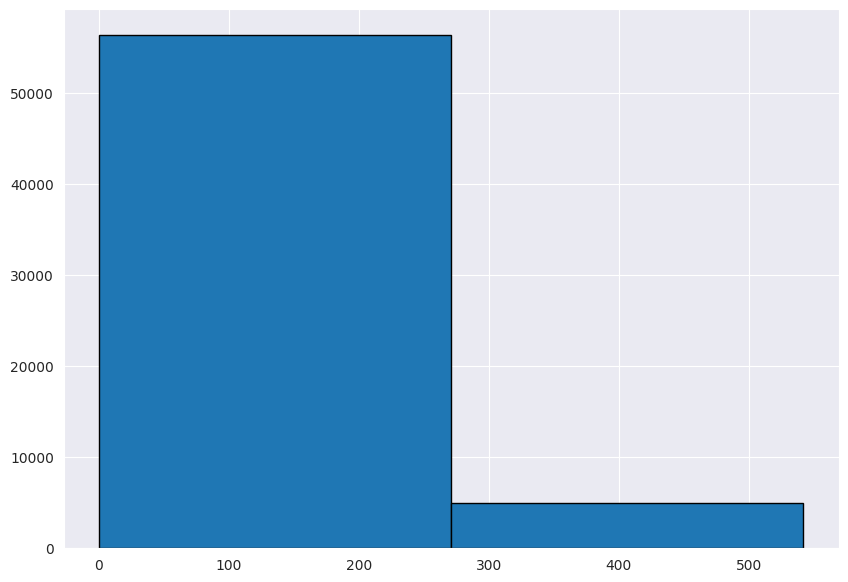

(array([56334.,  4915.]), array([  0., 271., 542.]), <BarContainer object of 2 artists>)


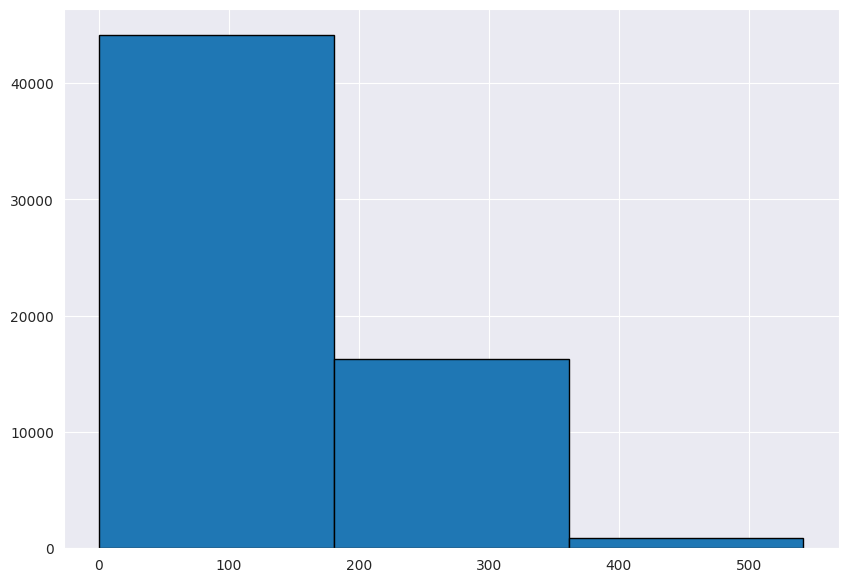

(array([44137., 16251.,   861.]), array([  0.        , 180.66666667, 361.33333333, 542.        ]), <BarContainer object of 3 artists>)


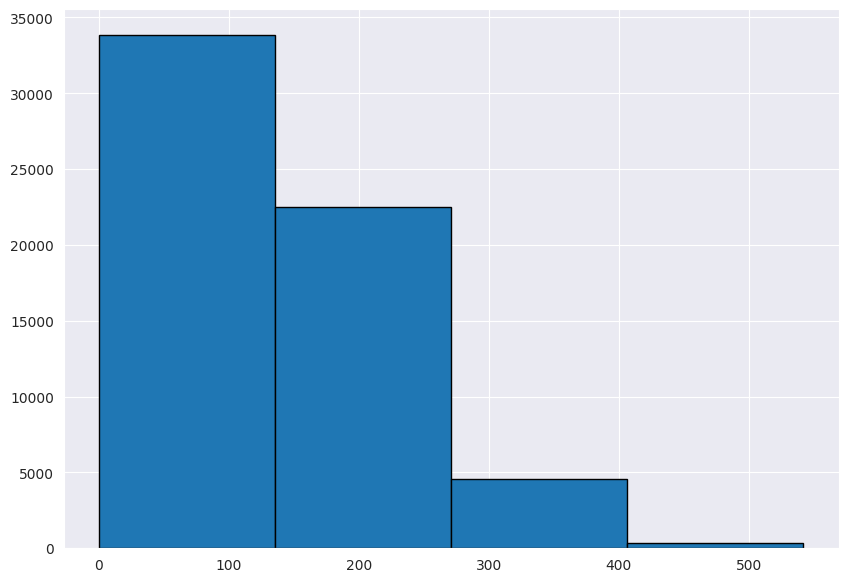

(array([33849., 22485.,  4569.,   346.]), array([  0. , 135.5, 271. , 406.5, 542. ]), <BarContainer object of 4 artists>)


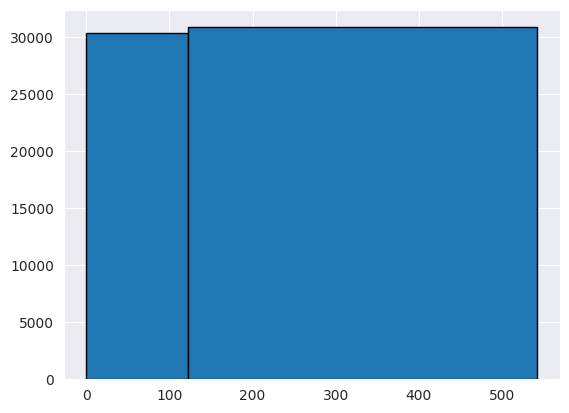

[  0. 122. 542.]


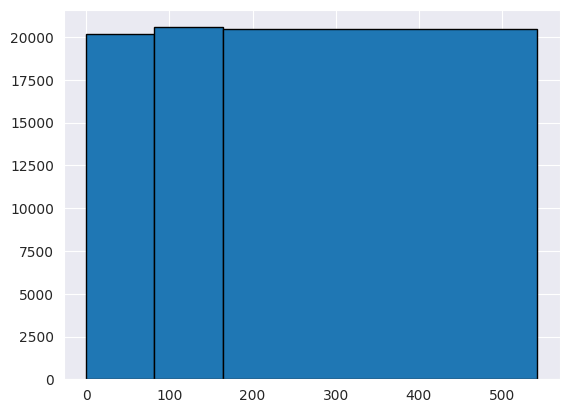

[  0.  81. 165. 542.]


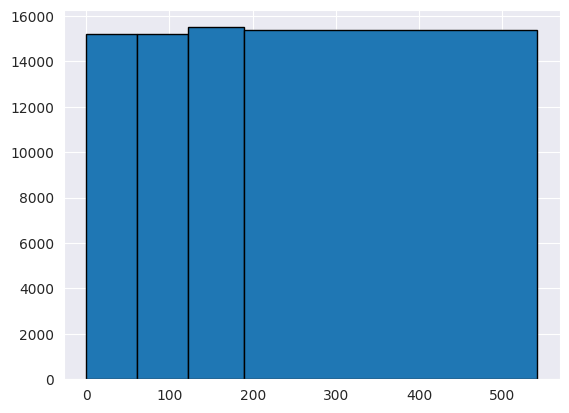

[  0.  61. 122. 190. 542.]


In [85]:
#-- fixing bins width -----
# Creating histogram of 2 bins(same width)
fig, ax = plt.subplots(figsize =(10, 7))
m=ax.hist(list(train['RUL']), bins = 2, edgecolor='black')
# Show plot
plt.show()
print(m)

# Creating histogram of 3 bins(same width)
fig, ax = plt.subplots(figsize =(10, 7))
m=ax.hist(list(train['RUL']), bins = 3, edgecolor='black')
# Show plot
plt.show()
print(m)

# Creating histogram of 4 bins(same width)
fig, ax = plt.subplots(figsize =(10, 7))
m=ax.hist(list(train['RUL']), bins = 4, edgecolor='black')
# Show plot
plt.show()
print(m)



#-- fixing bins height -----

l=len(list(train['RUL']))
k=l/4

#define function to calculate equal-frequency bins, bins=2
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins
n, bins, patches = plt.hist(list(train['RUL']), equalObs(list(train['RUL']), 2), edgecolor='black')
plt.show()
print(bins)

#define function to calculate equal-frequency bins, bins=3
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins
n, bins, patches = plt.hist(list(train['RUL']), equalObs(list(train['RUL']), 3), edgecolor='black')
plt.show()
print(bins)


#define function to calculate equal-frequency bins, bins=4
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins
n, bins, patches = plt.hist(list(train['RUL']), equalObs(list(train['RUL']), 4), edgecolor='black')
plt.show()
print(bins)

In [86]:
y_train_tm

8064     181
33509    161
26236    134
22531    146
15849     51
        ... 
54343     16
38158    195
860       66
15795    105
56422    112
Name: RUL, Length: 39811, dtype: int64

In [87]:
label_map={1:"RISK ZONE",2:"MODERATED RISK",3:"NO RISK"}

y=[]

#--Transforming rul values to classes :
for k in dftm['RUL']:
    if k<=68:
        y.append(1)
    elif k>69 and k<=137:
        y.append(2)
    else:
        y.append(3)
X_train_tm_c, X_test_tm_c, y_train_tm_c, y_test_tm_c=train_test_split(dftm.drop(columns=['unit_number','RUL']),np.array(y), test_size=0.35, stratify=np.array(y))
X_train_tm_cs=scaler.fit_transform(X_train_tm_c)
X_test_tm_cs=scaler.fit_transform(X_test_tm_c)

In [88]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true)))

In [89]:
# Fit du  Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 1)

In [90]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [91]:
y_valid_c=[]
for k in y_valid['RUL']:
    if k<=68:
        y_valid_c.append(1)
    elif k>69 and k<=137:
        y_valid_c.append(2)
    else:
        y_valid_c.append(3)

y_valid_c=np.array(y_valid_c)

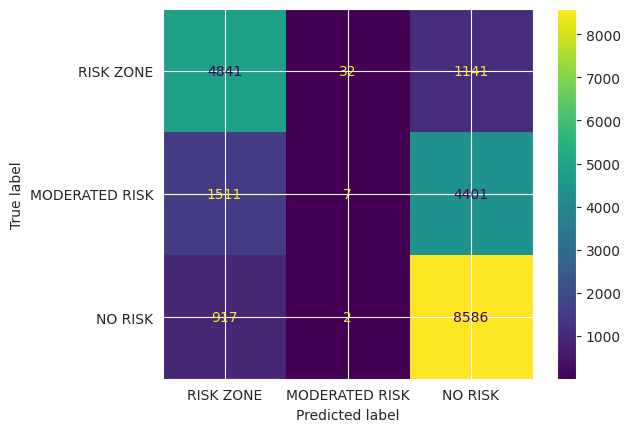

SVM
Accuracy score of training 0.629
Error rate of training 0.283
Accuracy score of test 0.627
Error rate of test 0.274
              precision    recall  f1-score   support

           1       0.67      0.80      0.73      6014
           2       0.17      0.00      0.00      5919
           3       0.61      0.90      0.73      9505

    accuracy                           0.63     21438
   macro avg       0.48      0.57      0.49     21438
weighted avg       0.50      0.63      0.53     21438



In [92]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

classifier.fit(X_train_tm_cs,np.array(y_train_tm_c))
y_svc_train=classifier.predict(X_train_tm_cs)

y_svc_test=classifier.predict(X_test_tm_cs)


cm= confusion_matrix(y_test_tm_c, y_svc_test, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('SVM')
print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train_tm_c, y_svc_train))
print("Error rate of training %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_svc_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_svc_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_svc_test))
print(metrics.classification_report(y_test_tm_c,y_svc_test))

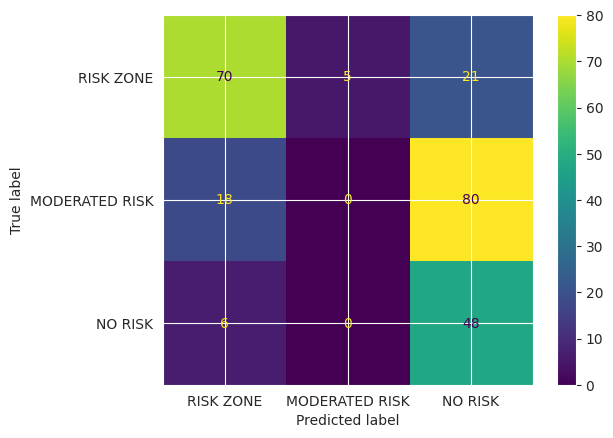

SVM
Accuracy score of validation 0.476
Error rate of validation 0.403
              precision    recall  f1-score   support

           1       0.74      0.73      0.74        96
           2       0.00      0.00      0.00        98
           3       0.32      0.89      0.47        54

    accuracy                           0.48       248
   macro avg       0.36      0.54      0.40       248
weighted avg       0.36      0.48      0.39       248



In [93]:
y_svc_valid=classifier.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_svc_valid, labels=classifier.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
disp.plot()
plt.show()
print('SVM')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c,  y_svc_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c, y_svc_valid))
print(metrics.classification_report(y_valid_c,  y_svc_valid))

In [94]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=5)

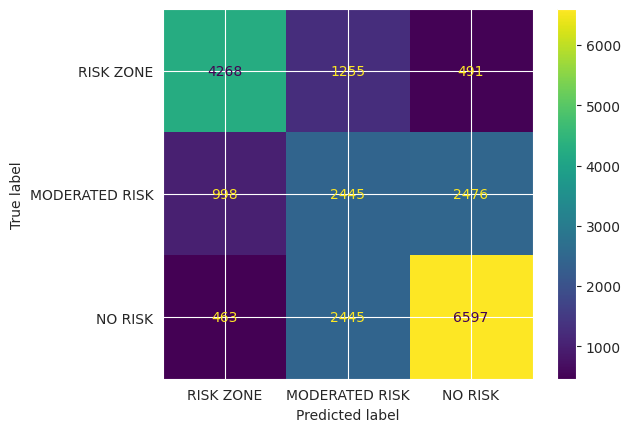

Random Forest Classifier
Accuracy score of test 0.964
Error rate of test 0.020
Accuracy score of test 0.621
Error rate of test 0.238
              precision    recall  f1-score   support

           1       0.74      0.71      0.73      6014
           2       0.40      0.41      0.41      5919
           3       0.69      0.69      0.69      9505

    accuracy                           0.62     21438
   macro avg       0.61      0.61      0.61     21438
weighted avg       0.62      0.62      0.62     21438



In [95]:
clf.fit(X_train_tm_cs,np.array(y_train_tm_c))
y_rfc_train=clf.predict(X_train_tm_cs)
y_rfc_test=clf.predict(X_test_tm_cs)
cm= confusion_matrix(y_test_tm_c, y_rfc_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[clf.classes_[0]],label_map[clf.classes_[1]],label_map[clf.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('Random Forest Classifier')
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_train_tm_c, y_rfc_train))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_rfc_train))

print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_rfc_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_rfc_test))

print(metrics.classification_report(y_test_tm_c,y_rfc_test))

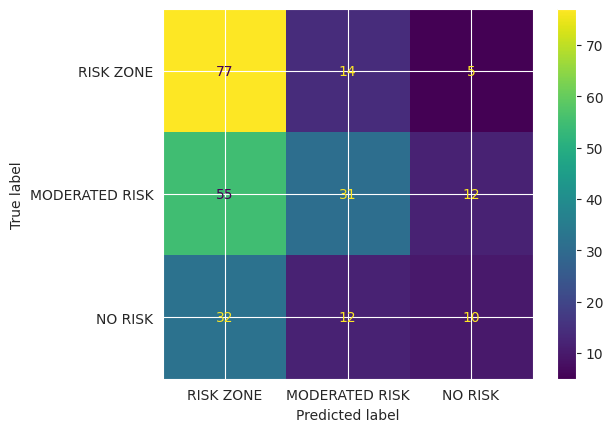

Random Forest Classifier
Accuracy score of validation 0.476
Error rate of validation 0.334
              precision    recall  f1-score   support

           1       0.47      0.80      0.59        96
           2       0.54      0.32      0.40        98
           3       0.37      0.19      0.25        54

    accuracy                           0.48       248
   macro avg       0.46      0.43      0.41       248
weighted avg       0.48      0.48      0.44       248



In [96]:
y_rfc_valid=clf.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_rfc_valid, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[clf.classes_[0]],label_map[clf.classes_[1]],label_map[clf.classes_[2]]])
disp.plot()
plt.show()
print('Random Forest Classifier')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c, y_rfc_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c,y_rfc_valid))
print(metrics.classification_report(y_valid_c,y_rfc_valid))

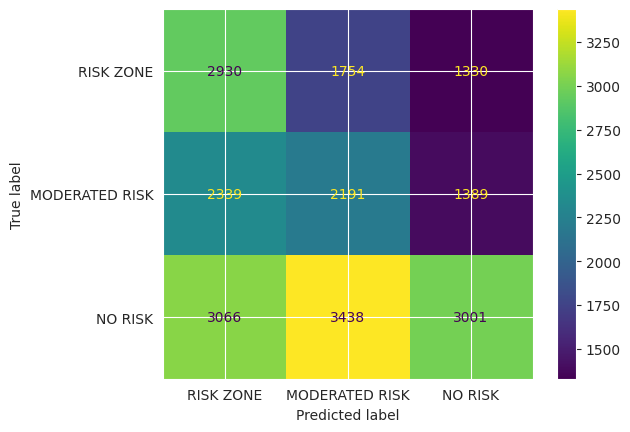

Guassian Naive Bayes
Accuracy score of train 0.384
Error rate of train 0.438
Accuracy score of test 0.379
Error rate of test 0.442
              precision    recall  f1-score   support

           1       0.35      0.49      0.41      6014
           2       0.30      0.37      0.33      5919
           3       0.52      0.32      0.39      9505

    accuracy                           0.38     21438
   macro avg       0.39      0.39      0.38     21438
weighted avg       0.41      0.38      0.38     21438



In [97]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_tm_cs,np.array(y_train_tm_c))

y_gnb_test= gnb.predict(X_test_tm_cs)
y_gnb_train= gnb.predict(X_train_tm_cs)


cm= confusion_matrix(y_test_tm_c, y_gnb_test, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[gnb.classes_[0]],label_map[gnb.classes_[1]],label_map[gnb.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('Guassian Naive Bayes')
print("Accuracy score of train %.3f" %metrics.accuracy_score(y_train_tm_c, y_gnb_train))
print("Error rate of train %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_gnb_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_gnb_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_gnb_test))

print(metrics.classification_report(y_test_tm_c,y_gnb_test))

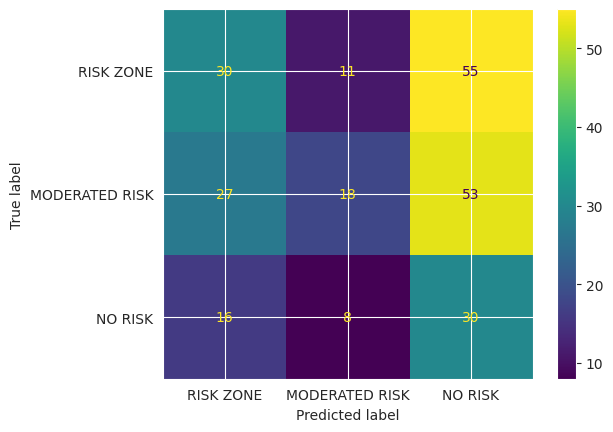

Random Forest Classifier
Accuracy score of validation 0.315
Error rate of validation 0.703
              precision    recall  f1-score   support

           1       0.41      0.31      0.36        96
           2       0.49      0.18      0.27        98
           3       0.22      0.56      0.31        54

    accuracy                           0.31       248
   macro avg       0.37      0.35      0.31       248
weighted avg       0.40      0.31      0.31       248



In [98]:
y_gnb_valid=gnb.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_gnb_valid, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[gnb.classes_[0]],label_map[gnb.classes_[1]],label_map[gnb.classes_[2]]])
disp.plot()
plt.show()
print('Random Forest Classifier')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c, y_gnb_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c,y_gnb_valid))
print(metrics.classification_report(y_valid_c,y_gnb_valid))

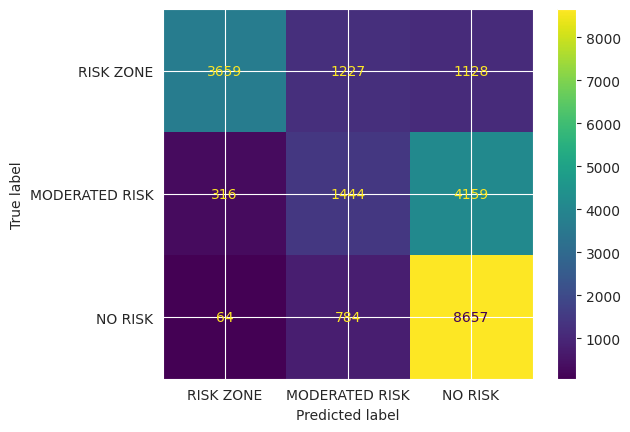

KNN
Accuracy score of train 0.653
Error rate of train 0.282
Accuracy score of test 0.642
Error rate of test 0.281
              precision    recall  f1-score   support

           1       0.91      0.61      0.73      6014
           2       0.42      0.24      0.31      5919
           3       0.62      0.91      0.74      9505

    accuracy                           0.64     21438
   macro avg       0.65      0.59      0.59     21438
weighted avg       0.64      0.64      0.62     21438



In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train_tm_cs,np.array(y_train_tm_c))

y_knn_test= knn.predict(X_test_tm_cs)
y_knn_train= knn.predict(X_train_tm_cs)

cm= confusion_matrix(y_test_tm_c, y_knn_test, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[knn.classes_[0]],label_map[knn.classes_[1]],label_map[knn.classes_[2]]])
disp.plot()
plt.show()

# Measure the performance
print('KNN')
print("Accuracy score of train %.3f" %metrics.accuracy_score(y_train_tm_c, y_knn_train))
print("Error rate of train %.3f" %mean_absolute_percentage_error(y_train_tm_c,y_knn_train))
print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test_tm_c, y_knn_test))
print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test_tm_c,y_knn_test))

print(metrics.classification_report(y_test_tm_c,y_knn_test))

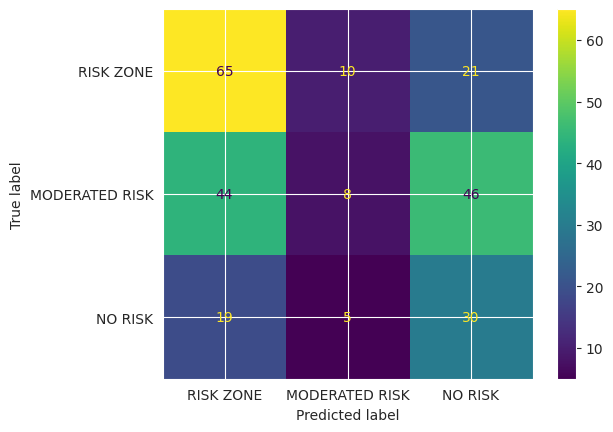

KNN
Accuracy score of validation 0.415
Error rate of validation 0.449
              precision    recall  f1-score   support

           1       0.51      0.68      0.58        96
           2       0.35      0.08      0.13        98
           3       0.31      0.56      0.40        54

    accuracy                           0.42       248
   macro avg       0.39      0.44      0.37       248
weighted avg       0.40      0.42      0.36       248



In [100]:
y_knn_valid=knn.predict(X_valid_s)
cm= confusion_matrix(y_valid_c, y_knn_valid, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[knn.classes_[0]],label_map[knn.classes_[1]],label_map[knn.classes_[2]]])
disp.plot()
plt.show()
print('KNN')
print("Accuracy score of validation %.3f" %metrics.accuracy_score(y_valid_c, y_knn_valid))
print("Error rate of validation %.3f" %mean_absolute_percentage_error(y_valid_c,y_knn_valid))
print(metrics.classification_report(y_valid_c,y_knn_valid))

In [101]:
def transform_to_classes(d):
    y=[]
    for k in d:
        if k<=68:
            y.append(1)
        elif k>69 and k<=137:
            y.append(2)
        else:
            y.append(3)
    return y

Index du train :  [    0     1     2 ... 61246 61247 61248] 

Index de test :  [    4     5    10 ... 61235 61237 61240]


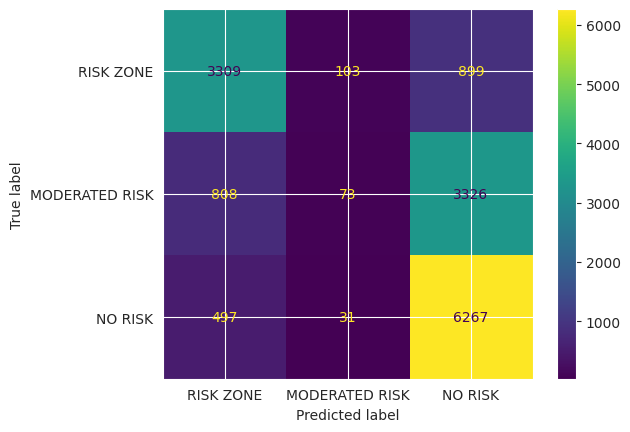

SVM
Accuracy score of training 0.631
Error rate of training 0.278
Accuracy score of test 0.630
Error rate of test 0.281
              precision    recall  f1-score   support

           1       0.72      0.77      0.74      4311
           2       0.35      0.02      0.03      4207
           3       0.60      0.92      0.73      6795

    accuracy                           0.63     15313
   macro avg       0.56      0.57      0.50     15313
weighted avg       0.56      0.63      0.54     15313

Index du train :  [    0     2     3 ... 61245 61246 61247] 

Index de test :  [    1     7    11 ... 61230 61232 61248]


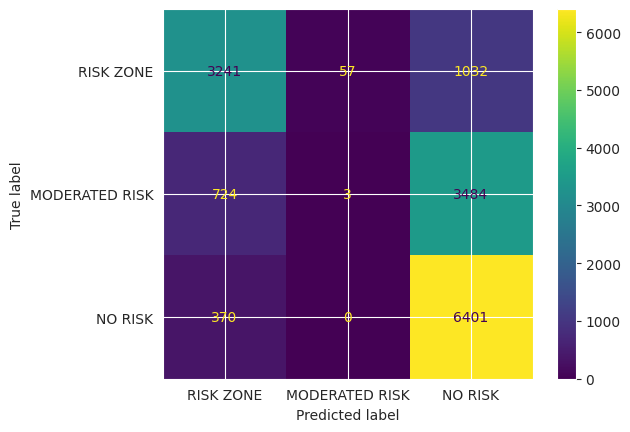

SVM
Accuracy score of training 0.628
Error rate of training 0.283
Accuracy score of test 0.630
Error rate of test 0.292
              precision    recall  f1-score   support

           1       0.75      0.75      0.75      4330
           2       0.05      0.00      0.00      4211
           3       0.59      0.95      0.72      6771

    accuracy                           0.63     15312
   macro avg       0.46      0.56      0.49     15312
weighted avg       0.48      0.63      0.53     15312

Index du train :  [    0     1     2 ... 61245 61247 61248] 

Index de test :  [    8     9    17 ... 61234 61239 61246]


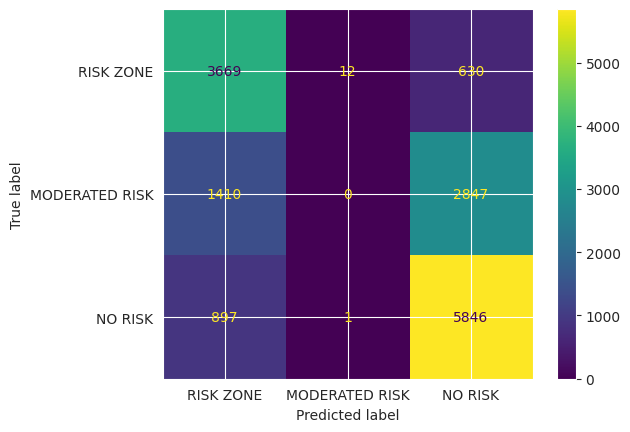

SVM
Accuracy score of training 0.629
Error rate of training 0.283
Accuracy score of test 0.621
Error rate of test 0.261
              precision    recall  f1-score   support

           1       0.61      0.85      0.71      4311
           2       0.00      0.00      0.00      4257
           3       0.63      0.87      0.73      6744

    accuracy                           0.62     15312
   macro avg       0.41      0.57      0.48     15312
weighted avg       0.45      0.62      0.52     15312

Index du train :  [    1     4     5 ... 61240 61246 61248] 

Index de test :  [    0     2     3 ... 61244 61245 61247]


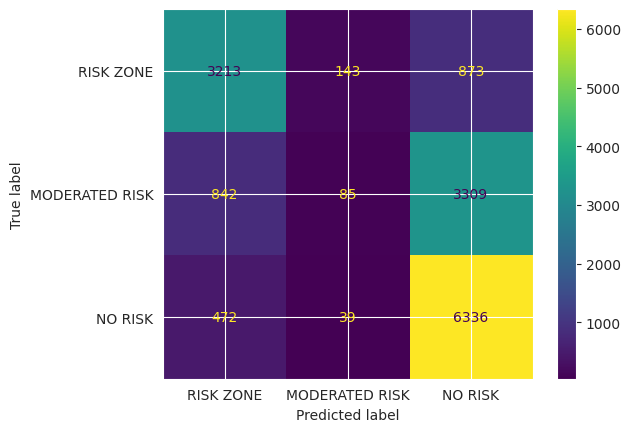

SVM
Accuracy score of training 0.630
Error rate of training 0.281
Accuracy score of test 0.629
Error rate of test 0.280
              precision    recall  f1-score   support

           1       0.71      0.76      0.73      4229
           2       0.32      0.02      0.04      4236
           3       0.60      0.93      0.73      6847

    accuracy                           0.63     15312
   macro avg       0.54      0.57      0.50     15312
weighted avg       0.55      0.63      0.54     15312



In [102]:
from sklearn.model_selection import KFold
train_tm_cv=dftm.drop(columns=['unit_number','RUL']).copy()
y=dftm['RUL']
cv = KFold(n_splits=4, shuffle=True)
for train_index, test_index in cv.split(train_tm) :
    print("Index du train : ", train_index, "\n")
    print("Index de test : ", test_index)
    X_train, X_test, y_train, y_test = train_tm_cv.iloc[train_index,:], train_tm_cv.iloc[test_index,:],np.array(transform_to_classes(y[train_index])), np.array(transform_to_classes(y[test_index]))
    classifier.fit(scaler.fit_transform(X_train), y_train)
    y_svc_train=classifier.predict(scaler.fit_transform(X_train))

    y_svc_test=classifier.predict(scaler.fit_transform(X_test))


    cm= confusion_matrix(y_test, y_svc_test, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[label_map[classifier.classes_[0]],label_map[classifier.classes_[1]],label_map[classifier.classes_[2]]])
    disp.plot()
    plt.show()

    # Measure the performance
    print('SVM')
    print("Accuracy score of training %.3f" %metrics.accuracy_score(y_train, y_svc_train))
    print("Error rate of training %.3f" %mean_absolute_percentage_error(y_train,y_svc_train))
    print("Accuracy score of test %.3f" %metrics.accuracy_score(y_test, y_svc_test))
    print("Error rate of test %.3f" %mean_absolute_percentage_error(y_test,y_svc_test))
    print(metrics.classification_report(y_test,y_svc_test))

In [103]:
#let's save our regression model and build an API around it
import pickle

model_pkl_file = "RUL_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(regressor, file)

model_scaler_pkl_file = "RUL_model_scaler.pkl"

with open(model_scaler_pkl_file, 'wb') as file:
    pickle.dump(scaler, file)

In [104]:
regressor.predict(scaler.fit_transform(X_test))

array([186.41188464, 192.10017443, 185.32632727, ...,  46.35525184,
        59.14924447,  17.57486692])

In [105]:
X_test.iloc[[0]]

,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,...,s_2_rm,s_3_rm,s_4_rm,s_7_rm,s_8_rm,s_9_rm,s_12_rm,s_13_rm,s_14_rm,s_18_rm
0,549.68,1343.43,1112.93,137.36,2211.86,8311.32,41.69,129.78,2387.99,8074.83,...,549.68,1343.43,1112.93,137.36,2211.86,8311.32,129.78,2387.99,8074.83,2212.0


In [106]:
first_row = X_test.iloc[[0]]
json_data = first_row.to_dict(orient='records')[0]

print(json_data)

{'s_2': 549.68, 's_3': 1343.43, 's_4': 1112.93, 's_7': 137.36, 's_8': 2211.86, 's_9': 8311.32, 's_11': 41.69, 's_12': 129.78, 's_13': 2387.99, 's_14': 8074.83, 's_17': 330, 's_18': 2212, 's_20': 10.62, 's_21': 6.367, 's_2_rm': 549.68, 's_3_rm': 1343.43, 's_4_rm': 1112.93, 's_7_rm': 137.36, 's_8_rm': 2211.86, 's_9_rm': 8311.32, 's_12_rm': 129.78, 's_13_rm': 2387.99, 's_14_rm': 8074.83, 's_18_rm': 2212.0}


# THE END